# Análisis de discrimante lineal


En 1936, Fisher formuló su teoría para el discriminate lineal (Lineal discriminant) el cual tiene muchas utilidades como clasificador.

Su concepto es similar al del PCA en el cual trata de realizar una reducción de similaridad, pero mientras el PCA es un aprendizaje **no supervisado** el LDA es **supervisado**. Utilizando esta información buscaremos la proyección que mejor nos permita separar las dos clases de interés.

![](img/proyeccion.png)

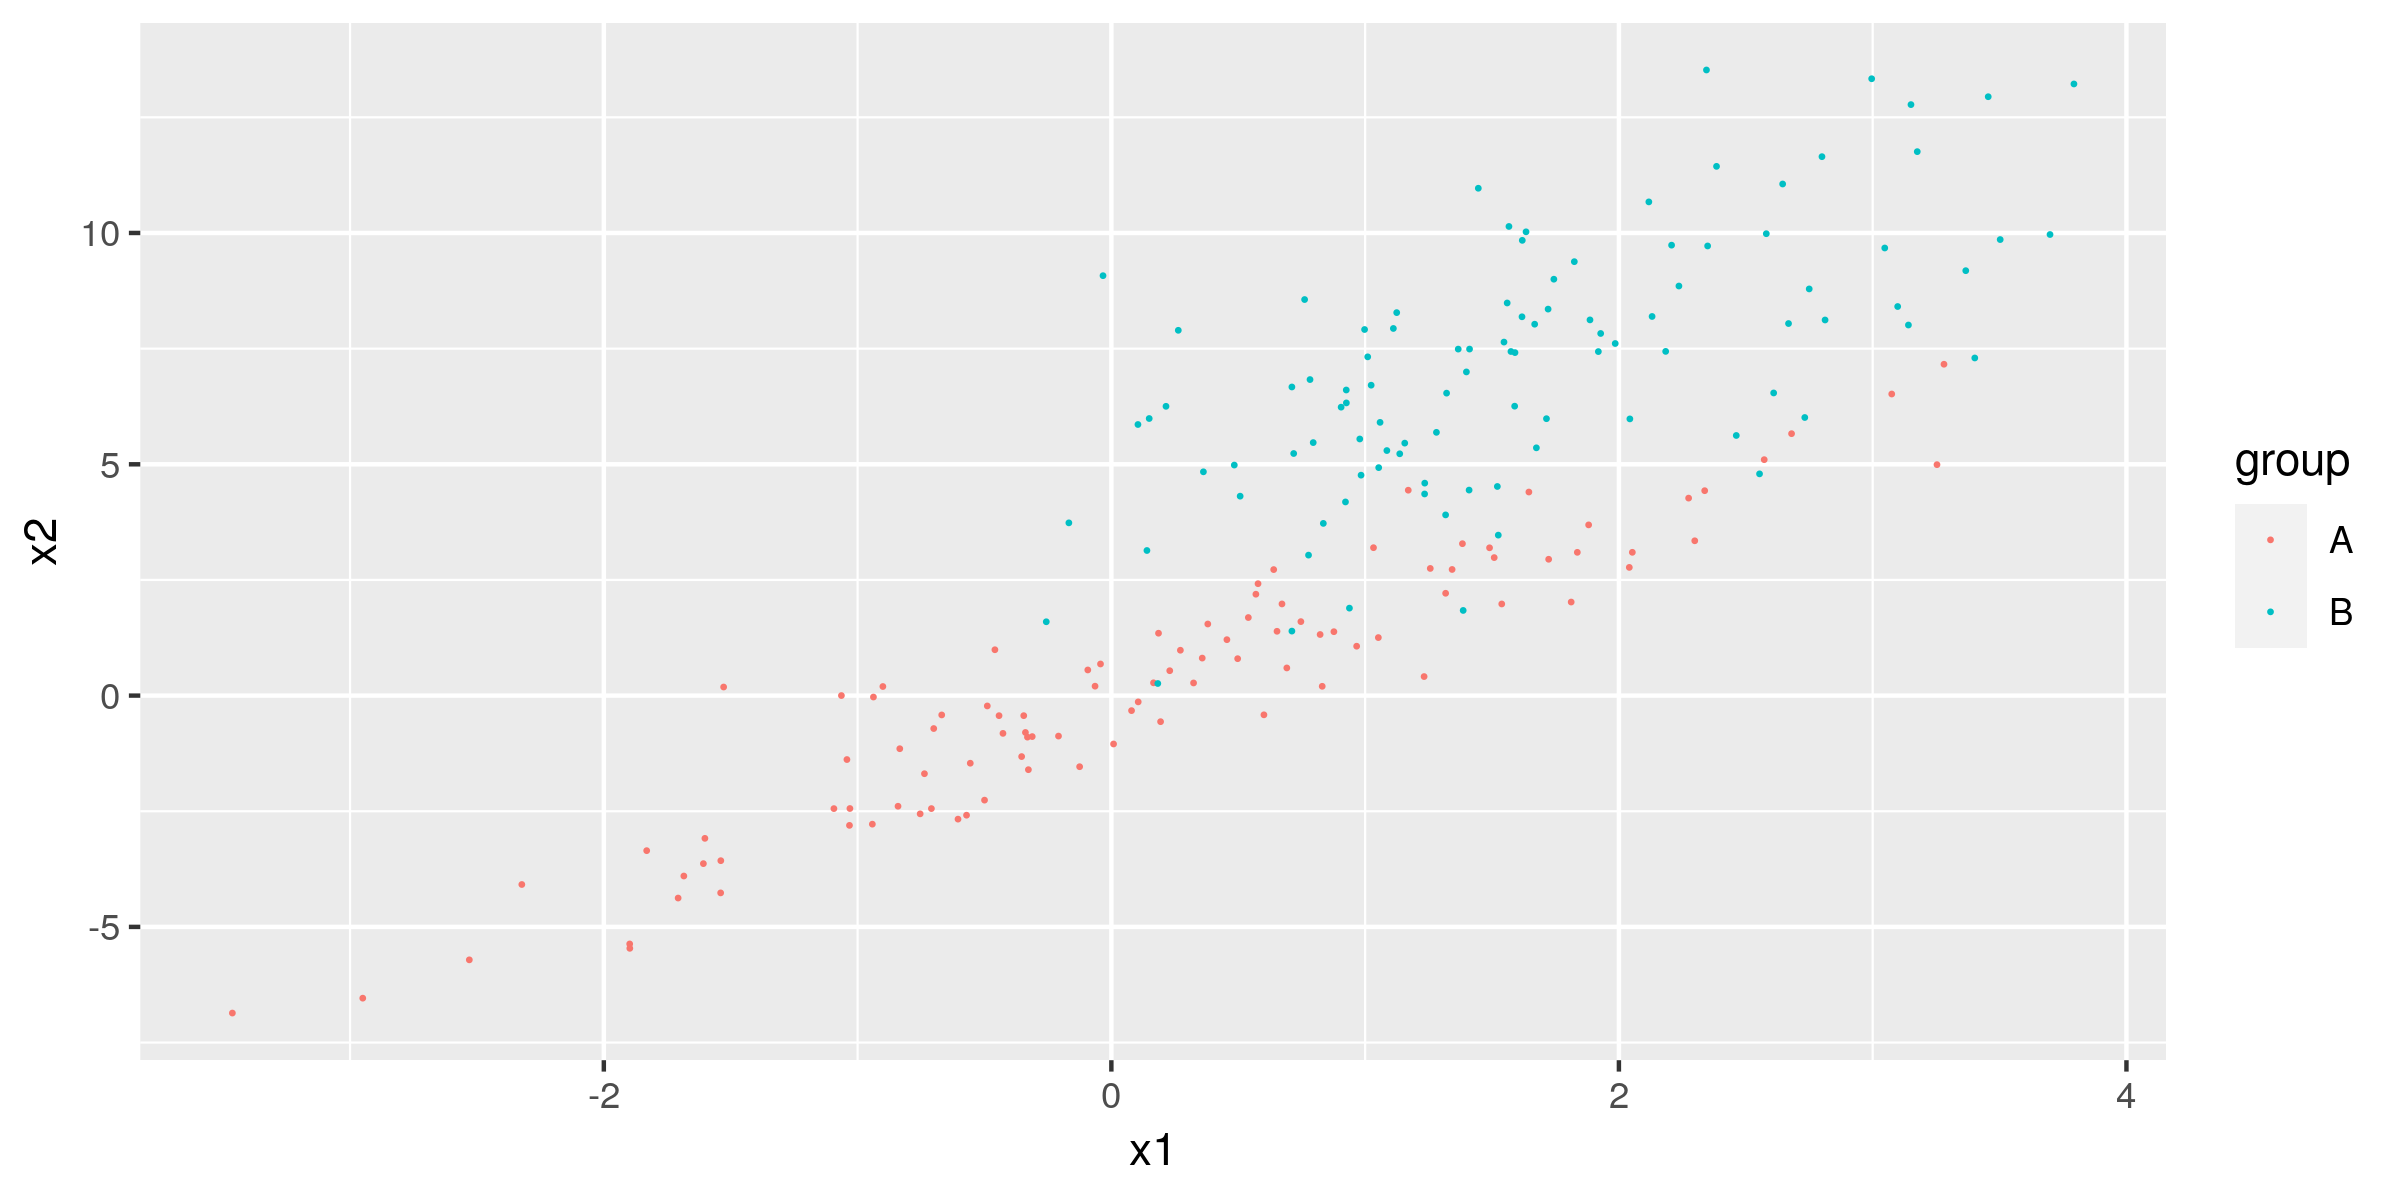

In [5]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)


set.seed(123)
N<-100
x1<-rnorm(N,mean=0,sd=1.5)
x2<-x1*2+rnorm(N,mean=0,sd=1)
dfa<-data.frame(group="A",x1=x1,x2=x2, stringsAsFactors = T)

x1<-rnorm(N,mean=1.5,sd=1)
x2<-x1*2+rnorm(N,mean=4,sd=2)
dfb<-data.frame(group="B",x1=x1,x2=x2, stringsAsFactors = T)

df<-data.frame(rbind(dfa,dfb))
options(repr.plot.height=4,repr.plot.width=8)
library(ggplot2)
ggplot(df,aes(x=x1,y=x2,color=group))+geom_point(size=0.1)

[1] "The AUC is 0.9649"

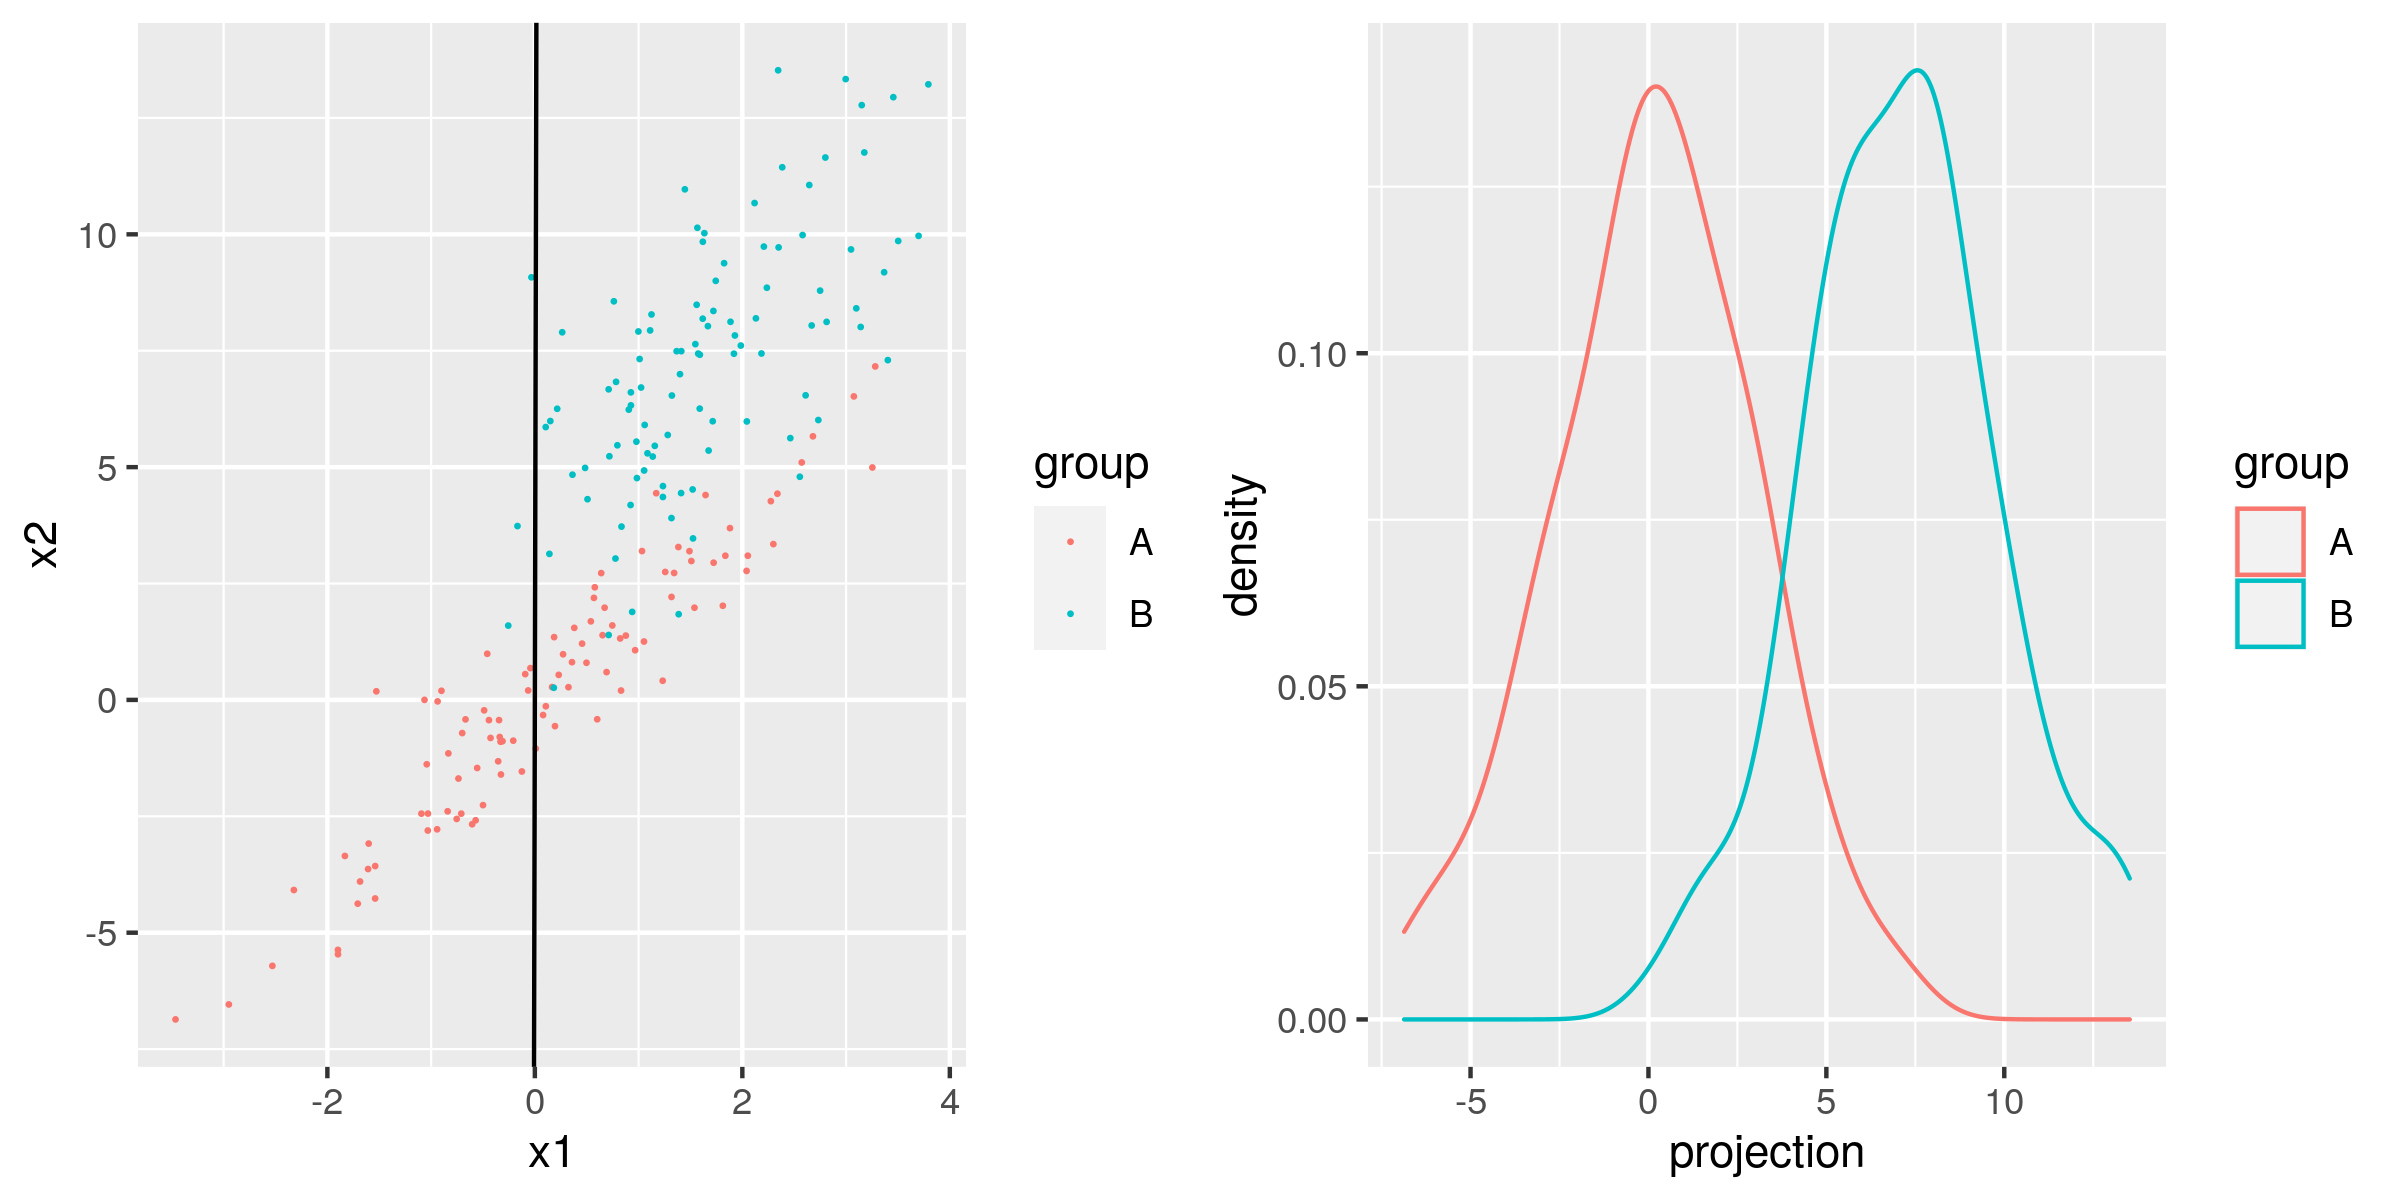

In [6]:

w<-matrix(c(0.001,1),nrow = 2)
w<-w/sqrt(sum(w^2))

g1<-ggplot(df,aes(x=x1,y=x2,color=group))+geom_point(size=0.1)+geom_abline(slope=w[2]/w[1])
df$projection<-as.matrix(df[,2:3]) %*% w
g2<-ggplot(df,aes(x=projection,color=group))+geom_density()

library(ggpubr)
ggarrange(g1,g2,ncol = 2)
library(ROCR)

pr <- prediction(df$projection, df$group)
prf_auc=performance(pr, measure = "auc")
paste("The AUC is",prf_auc@y.values[[1]])

Consideremos que tenemos dos clases y un vector sobre el que proyectaremos las dos clases, de tal forma que podamos resumir el valor de cada muestra en una sola dimensión. 
\\[
\vec y = X · \vec{w}
\\]
Donde
* X son los datos que queremos clasificar $X \in \mathbb{R}^{N\times p}$
* v es el vector de proyección, $w \in \mathbb{R}^{p\times1}$
* y son los datos proyectados, $y \in \mathbb{R}^{N\times1}$

Si, sobre el valor de $y$ definimos un umbral $th_0$ tal que si $y \geq th_0$ pertenece a una clase y si no a la otra. La elección del umbral y del vector $\vec w$ determinarán la calidad del decisor.

Una posible idea sería seleccionar un vector $w$ tal que:
\\[    
\vec w \propto (\vec m_B- \vec m_A) 
\\]
Donde:
\\[
\vec m_n=\frac{1}{N_n}\sum_{n \in C_n}{\vec{x_n}}
\\]

In [7]:
mA<-as.matrix(colMeans(subset(df,group=="A")[,c("x1","x2")]))
mB<-as.matrix(colMeans(subset(df,group=="B")[,c("x1","x2")]))
w <- mB-mA
w <- w/sum(w^2)
w

x1,0.02896025
x2,0.13662008


[1] "The AUC is 0.9602"

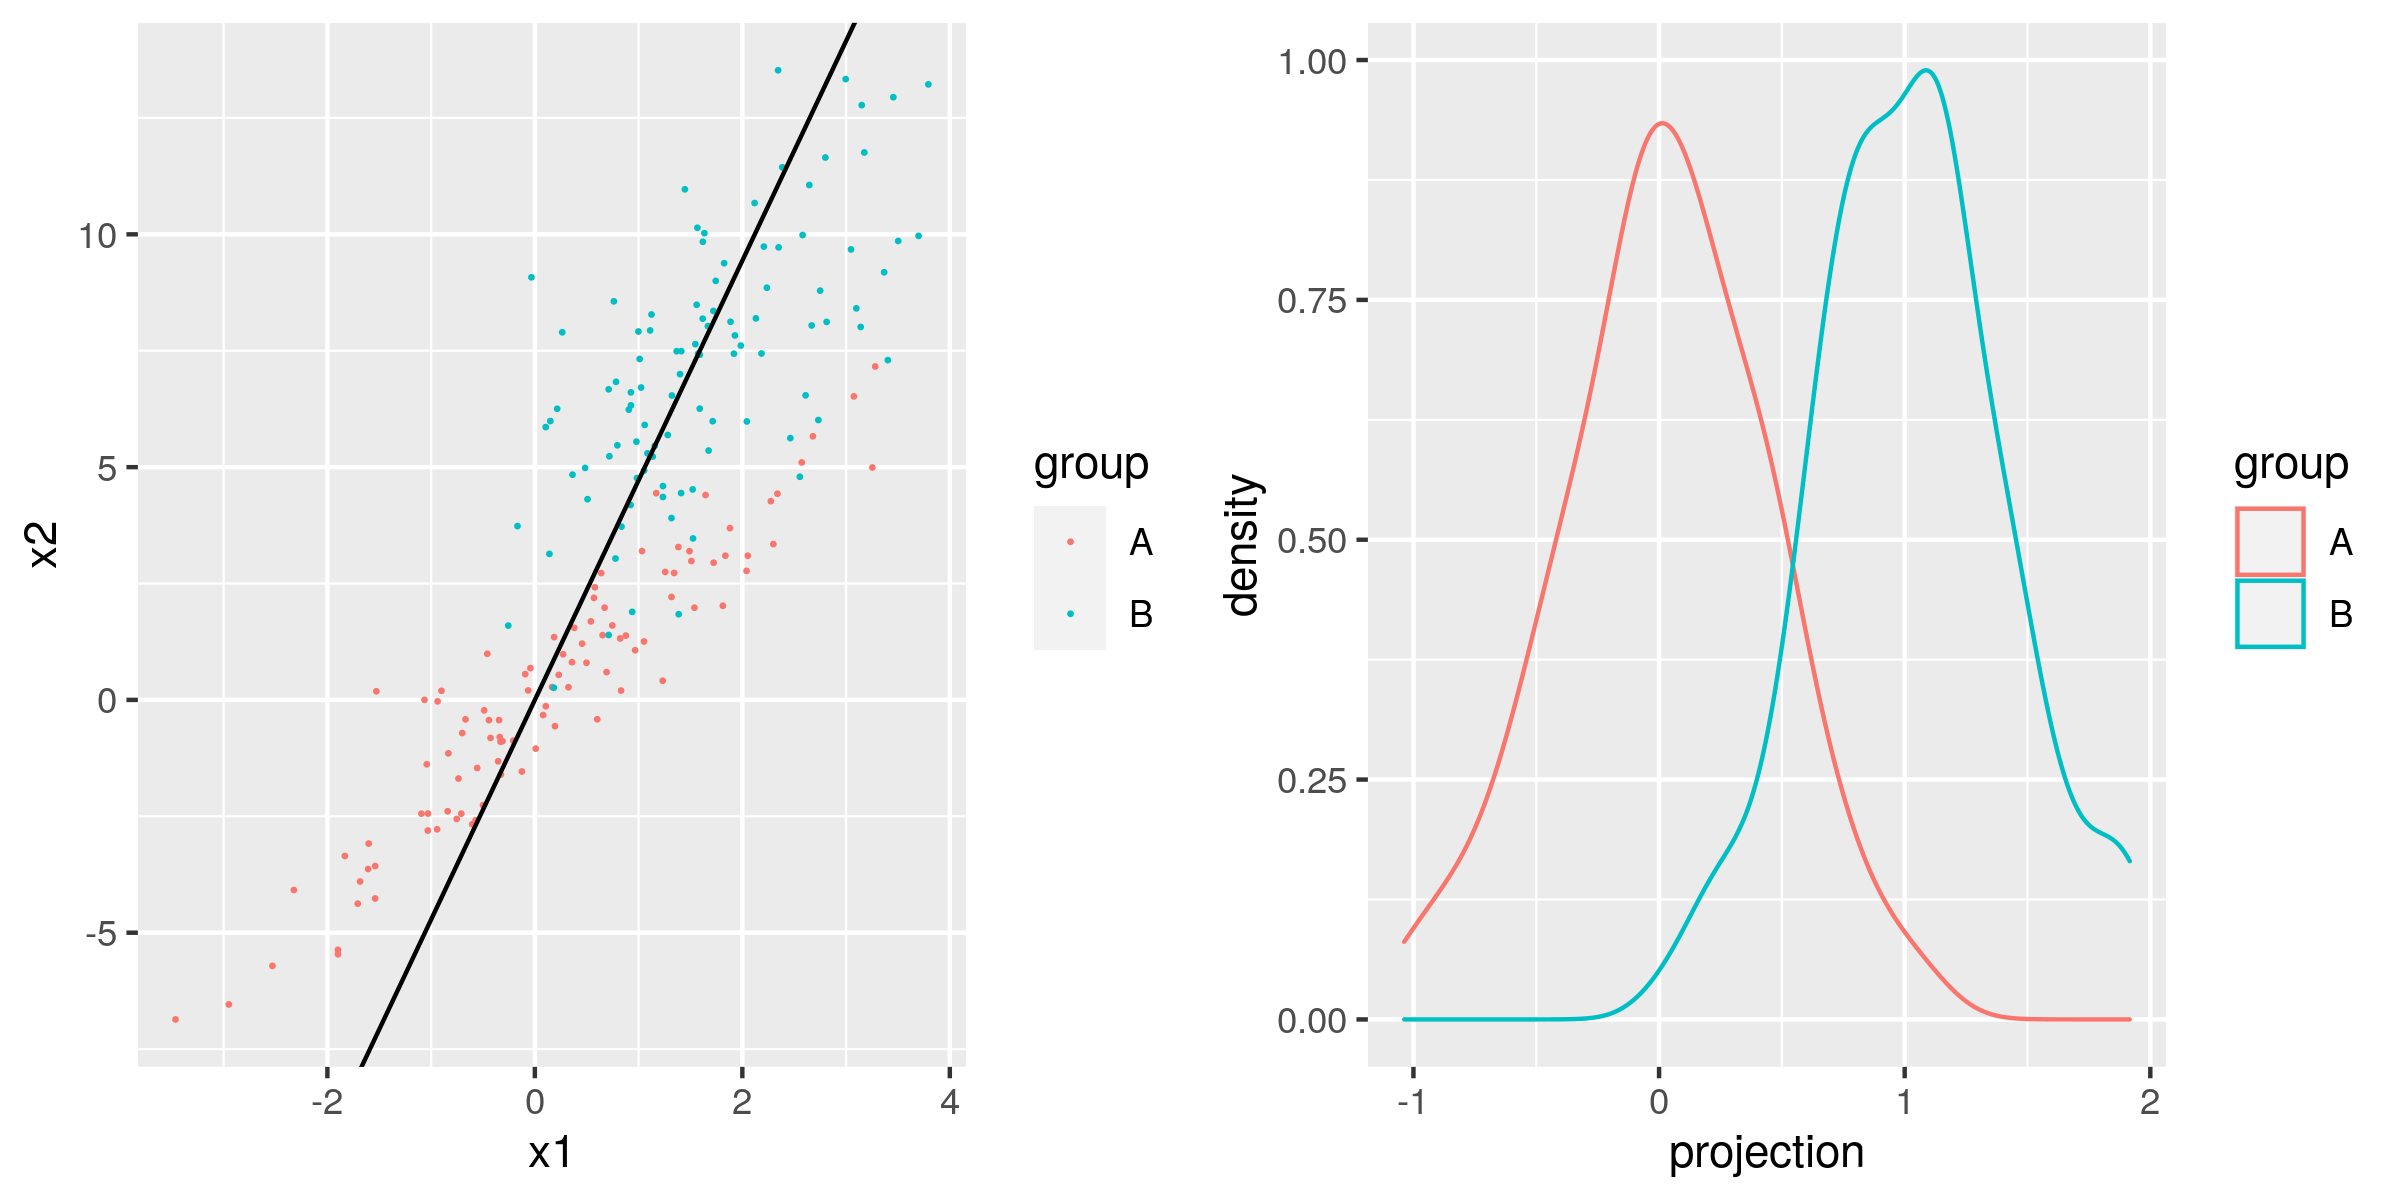

In [8]:
g1<-ggplot(df,aes(x=x1,y=x2,color=group))+geom_point(size=0.1)+geom_abline(slope=w[2]/w[1])
df$projection<-as.matrix(df[,2:3]) %*% w
g2<-ggplot(df,aes(x=projection,color=group))+geom_density()
ggarrange(g1,g2,ncol = 2)

pr <- prediction(df$projection, df$group)
prf_auc=performance(pr, measure = "auc")
paste("The AUC is",prf_auc@y.values[[1]])

Esta, aunque es una solución aparentemente buena no es el óptimo. Fisher lo que busca es el máximo del cociente:
\\[
    J(w)=\frac{\sigma_{entre ~ clases}}{\sigma_{dentro ~ clases}} = \frac{m_B-m_A}{\sigma_{A proyectado}^2+\sigma_{Bproyectado}^2}=\frac{\vec w^T S_{between} \vec w}{\vec w^T S_{within} \vec w}
\\]
Donde $S_{between}$ es la varianza que hay entre clases:
\\[
S_{between} = (\vec m_B - \vec m_A)(\vec m_B - \vec m_A)^T
\\]
Recordemos la fórmula de la covarianza entre dos grupos $x$ e $y$ del módulo de estadística:
\\[
cov(X,Y) = \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)\left( y_i-\bar{y} \right)
\\]
Donde $S_{within}$ es la suma de las varianzas de cada grupo:
\\[
S_{within} = \sum_{n \in C_A} (\vec x_n - m_A)(\vec x_n - m_A)^T + \sum_{n \in C_B} (\vec x_n - m_B)(\vec x_n - m_B)^T
\\]
El mínimo de la función $J(w)$ aparece para un $\vec w$ proporcional a:
\\[
\vec w \propto S_{within}^{-1}(\vec m_B- \vec m_A) 
\\]



In [9]:
mA<-as.matrix(colMeans(subset(df,group=="A")[,c("x1","x2")]))
mB<-as.matrix(colMeans(subset(df,group=="B")[,c("x1","x2")]))

xA<-t(as.matrix(subset(df,group=="A")[,c("x1","x2")]))
xB<-t(as.matrix(subset(df,group=="B")[,c("x1","x2")]))

In [10]:
mA_rep<-matrix(rep(mA,each=ncol(xA)), ncol=ncol(xA), byrow=TRUE)
mB_rep<-matrix(rep(mB,each=ncol(xB)), ncol=ncol(xB), byrow=TRUE)

In [11]:
Sw<-(xA-mA_rep) %*% t(xA-mA_rep)+(xB-mB_rep) %*% t(xB-mB_rep)

In [12]:
w<-solve(Sw) %*% (mB-mA)
w<-w/sqrt(sum(w^2))
w

x1,-0.7841725
x2,0.6205429


[1] "The AUC is 0.9772"

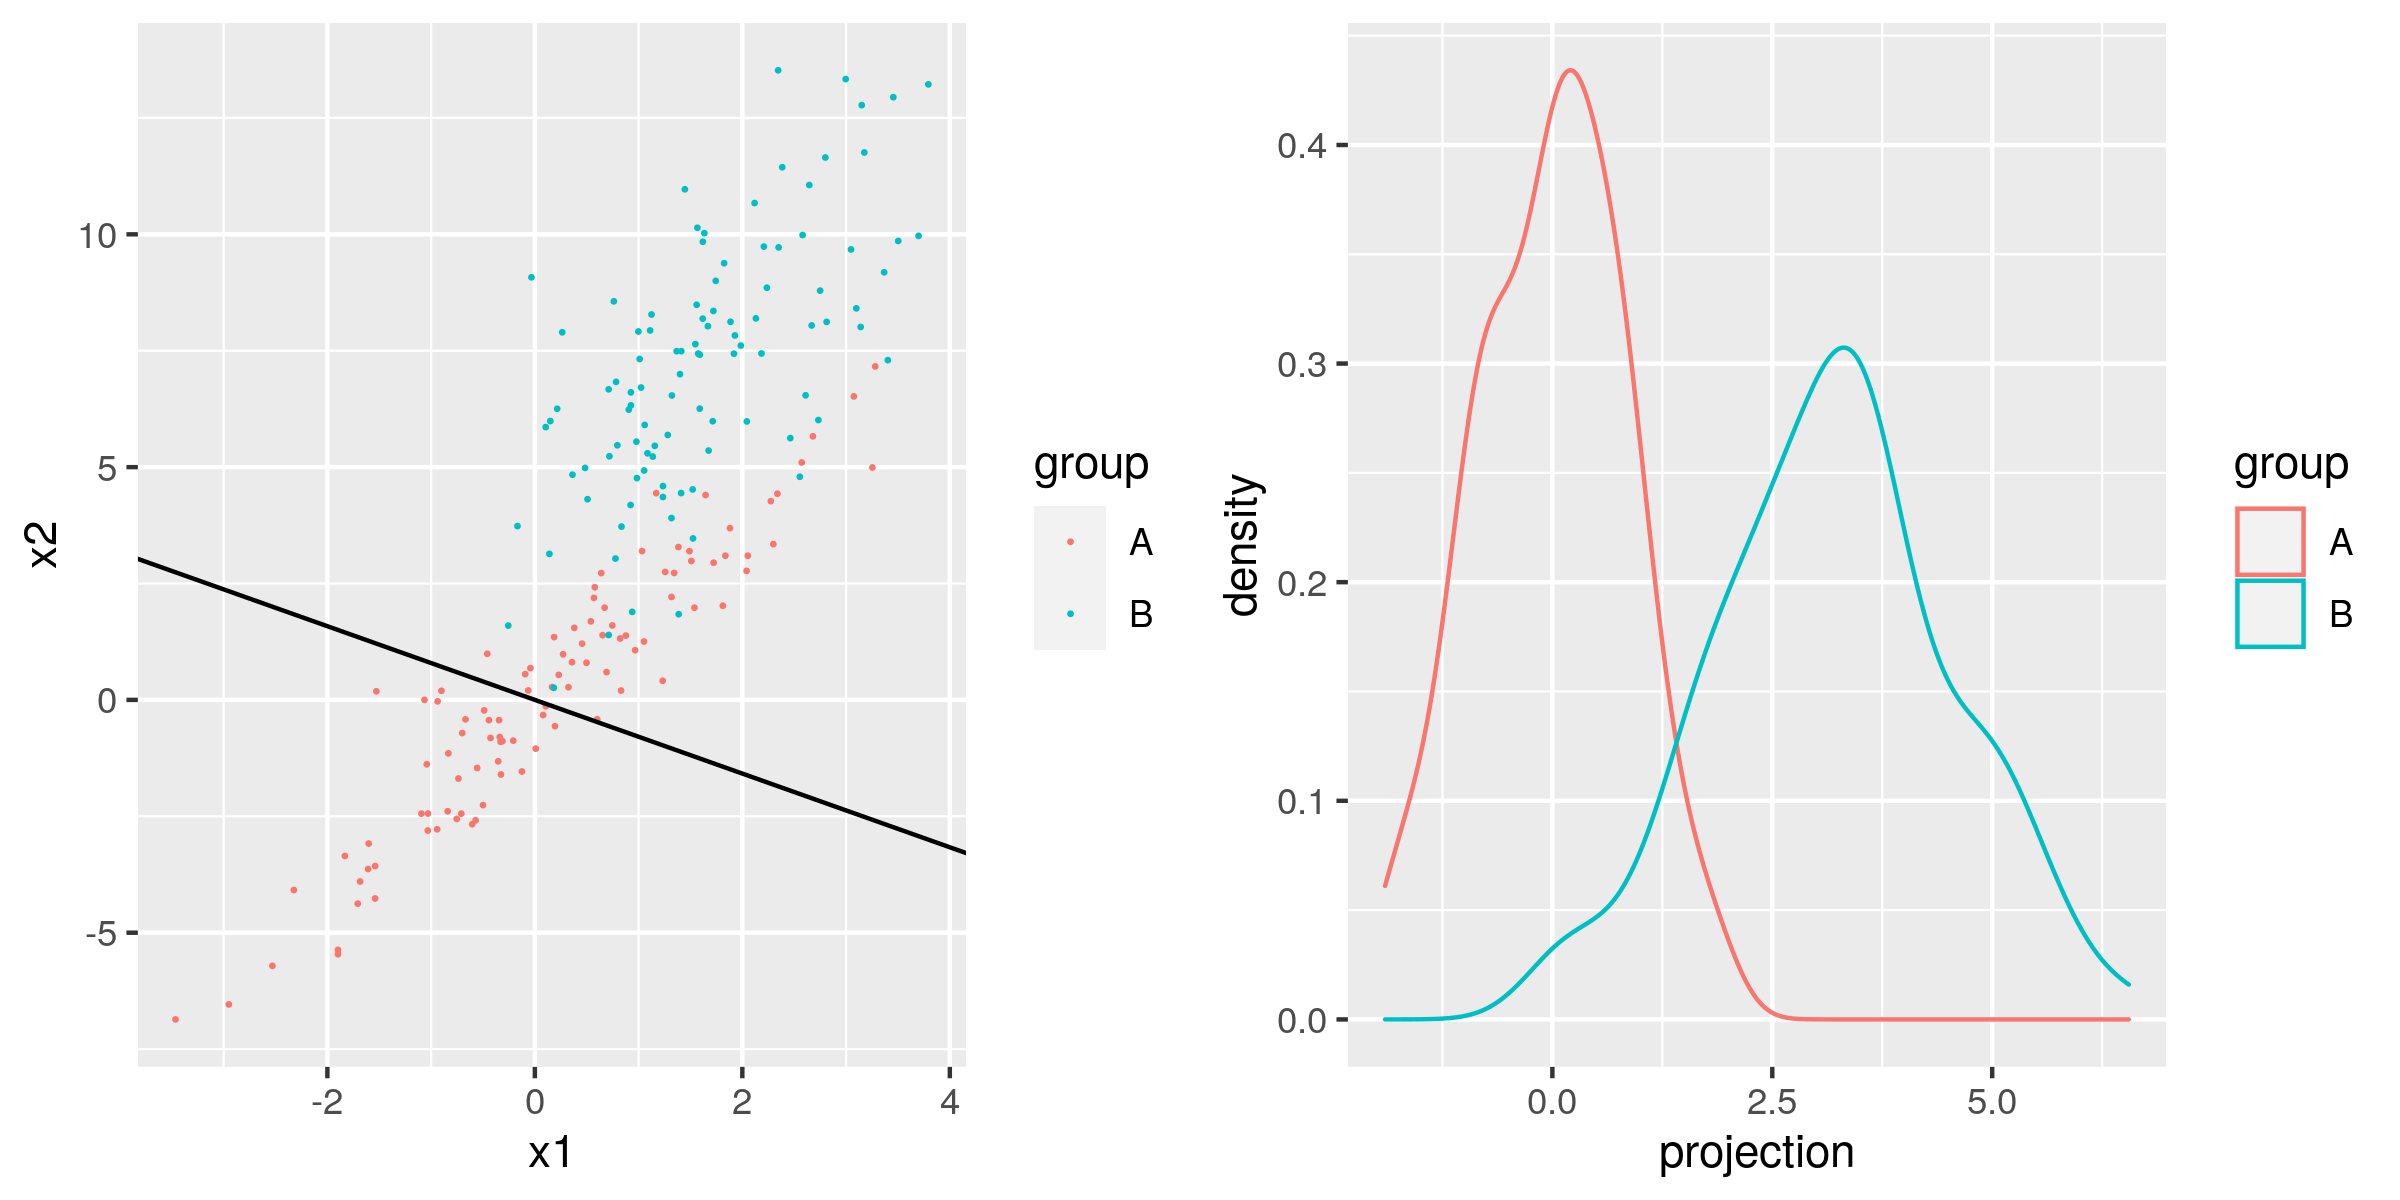

In [13]:
g1<-ggplot(df,aes(x=x1,y=x2,color=group))+geom_point(size=0.1)+geom_abline(slope=w[2]/w[1])
df$projection<-as.matrix(df[,2:3]) %*% w
g2<-ggplot(df,aes(x=projection,color=group))+geom_density()

ggarrange(g1,g2,ncol = 2)
pr <- prediction(df$projection, df$group)
prf_auc=performance(pr, measure = "auc")
paste("The AUC is",prf_auc@y.values[[1]])

En R tenemos la función *lda()* del paquete MASS que nos permite hacer esto mismo de una forma más sencilla:

In [14]:
library(MASS)
l<-lda(group~x1+x2,data=df)
l

Call:
lda(group ~ x1 + x2, data = df)

Prior probabilities of groups:
  A   B 
0.5 0.5 

Group means:
         x1        x2
A 0.1356089 0.1636709
B 1.6204651 7.1684844

Coefficients of linear discriminants:
          LD1
x1 -0.6993581
x2  0.5534264

Ambos dan el mismo resultado que teníamos antes:

In [15]:
l$scaling/sqrt(sum(l$scaling^2))
w

,LD1
x1,-0.7841725
x2,0.6205429


x1,-0.7841725
x2,0.6205429


Define un umbral para clasificar la clase:

In [16]:
(mA+mB)/2
l$scaling

x1,0.878037
x2,3.666078


,LD1
x1,-0.6993581
x2,0.5534264


In [22]:
th<-c(t(l$scaling) %*% (mA+mB)/2)
th

[1] 1.414842

Podemos ver la proyección y la clase clasificada con predict:

In [23]:
#predict(l,df)

In [24]:
#predict(l,df)$x

El resultado de la función predict() sobre el modelo lda es equivalente a:
\\[
X · \vec w - \vec w^T ·(\vec m_B + \vec m_A)/2
\\]


In [42]:
head(data.frame(
    multiplicacion=unname(
     as.matrix(df[,2:3]) %*% l$scaling),
    multiplicacion_th=unname(
        as.matrix(df[,2:3]) %*% l$scaling-th),
    predict=unname(
        predict(l,df)$x)))

,multiplicacion,multiplicacion_th,predict
,<dbl>,<dbl>,<dbl>
1,-0.735743936,-2.1505857,-2.1505857
2,0.001472089,-1.4133697,-1.4133697
3,0.816222066,-0.5986197,-0.5986197
4,-0.149241556,-1.5640833,-1.5640833
5,-0.447624729,-1.8624665,-1.8624665
6,1.023400080,-0.3914417,-0.3914417


In [27]:
# La media de los residuos es 0:
sum(as.matrix(df[,2:3]) %*% l$scaling-th-predict(l,df)$x)

[1] 7.460005e-14

### Comparación con regresión logística

In [28]:
model_glm<-glm(group~x1+x2,data=df,family=binomial)
model_glm
betalg<-model_glm$coefficients


Call:  glm(formula = group ~ x1 + x2, family = binomial, data = df)

Coefficients:
(Intercept)           x1           x2  
     -3.641       -2.206        1.729  

Degrees of Freedom: 199 Total (i.e. Null);  197 Residual
Null Deviance:	    277.3 
Residual Deviance: 71.62 	AIC: 77.62

Recordemos que significaban estos coeficientes:
\\[
log\left( \frac{p_A}{p_B} \right) = \beta_0+\beta_1·x_1+\beta_2·x2   
\\]

El umbral de decisión de una clase u otra lo tenemos en:
\\[
0 = \beta_0+\beta_1·x_1+\beta_2·x2 \\
\beta_2·x2= -\beta_0-\beta_1·x_1 \\
x2= -\frac{\beta_0}{\beta_2}-\frac{\beta_1}{\beta_2}x_1
\\]

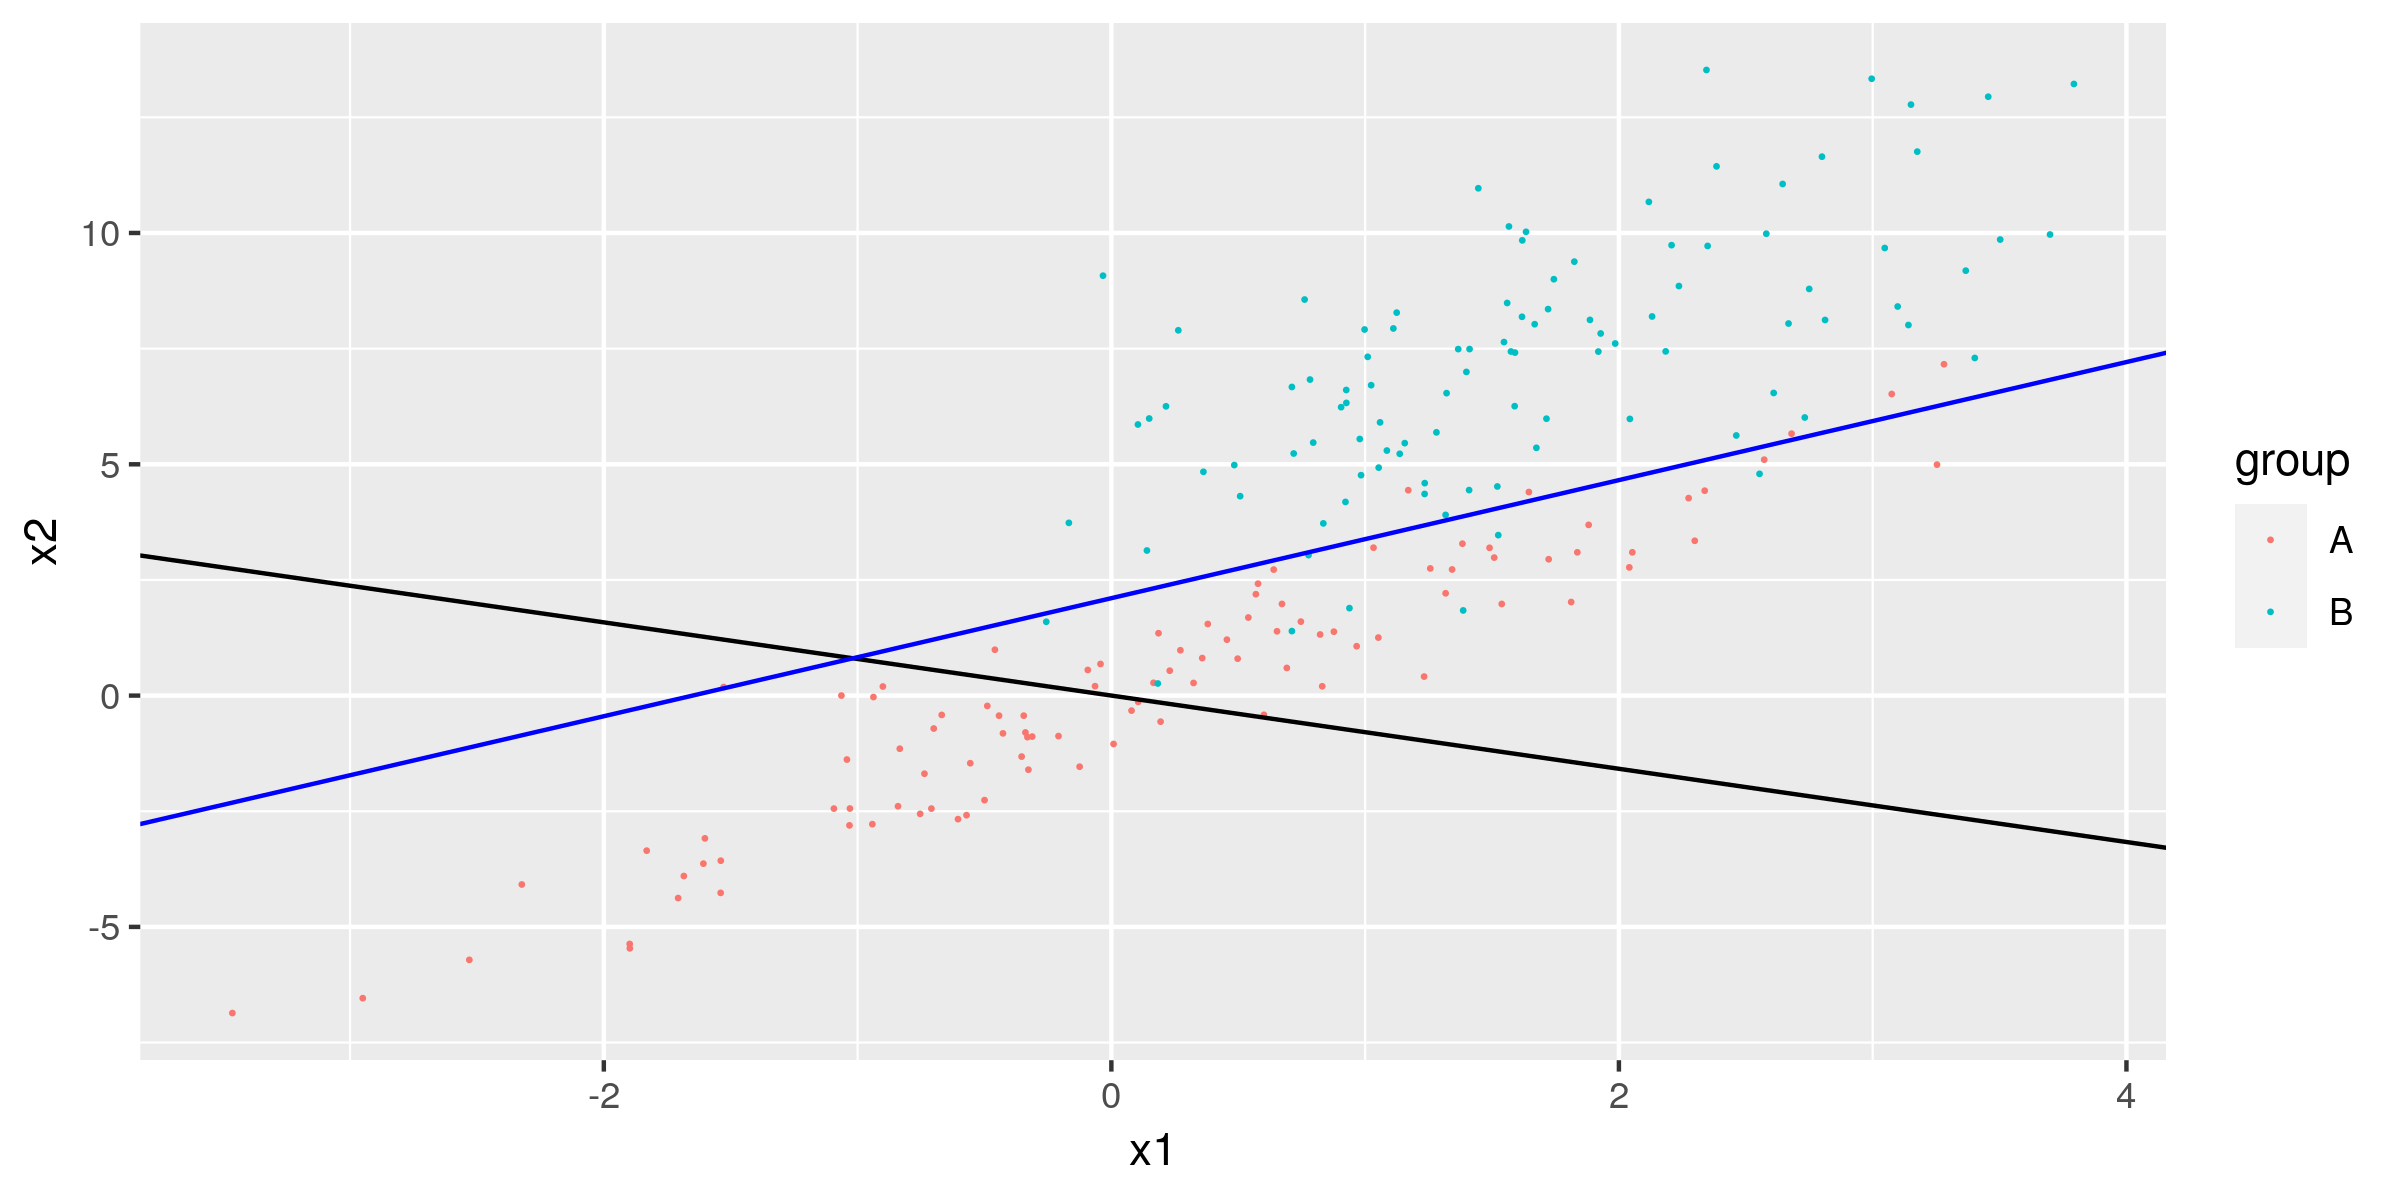

In [29]:
g1<-ggplot(df,aes(x=x1,y=x2,color=group))+geom_point(size=0.1)+geom_abline(slope=w[2]/w[1])+
geom_abline(intercept = -betalg[1]/betalg[3],slope = -betalg[2]/betalg[3], color="blue" )    
g1

Aunque no lo parezca por la perspectiva de la gráfica, ambas rectas son orgonales. El vector que define la pendiente de la curva dada por $\beta$ es el mismo que el vector $\vec w$:

In [30]:
model_glm$coefficients

(Intercept)          x1          x2 
  -3.641388   -2.205578    1.728514

In [31]:
b<-model_glm$coefficients[c("x1","x2")]
b<-b/sqrt(sum(b^2))
b

x1         x2 
-0.7870876  0.6168413

In [32]:
w

x1,-0.7841725
x2,0.6205429


![](#https://media2.giphy.com/media/Z5HVfEvnxr67u/giphy.gif)

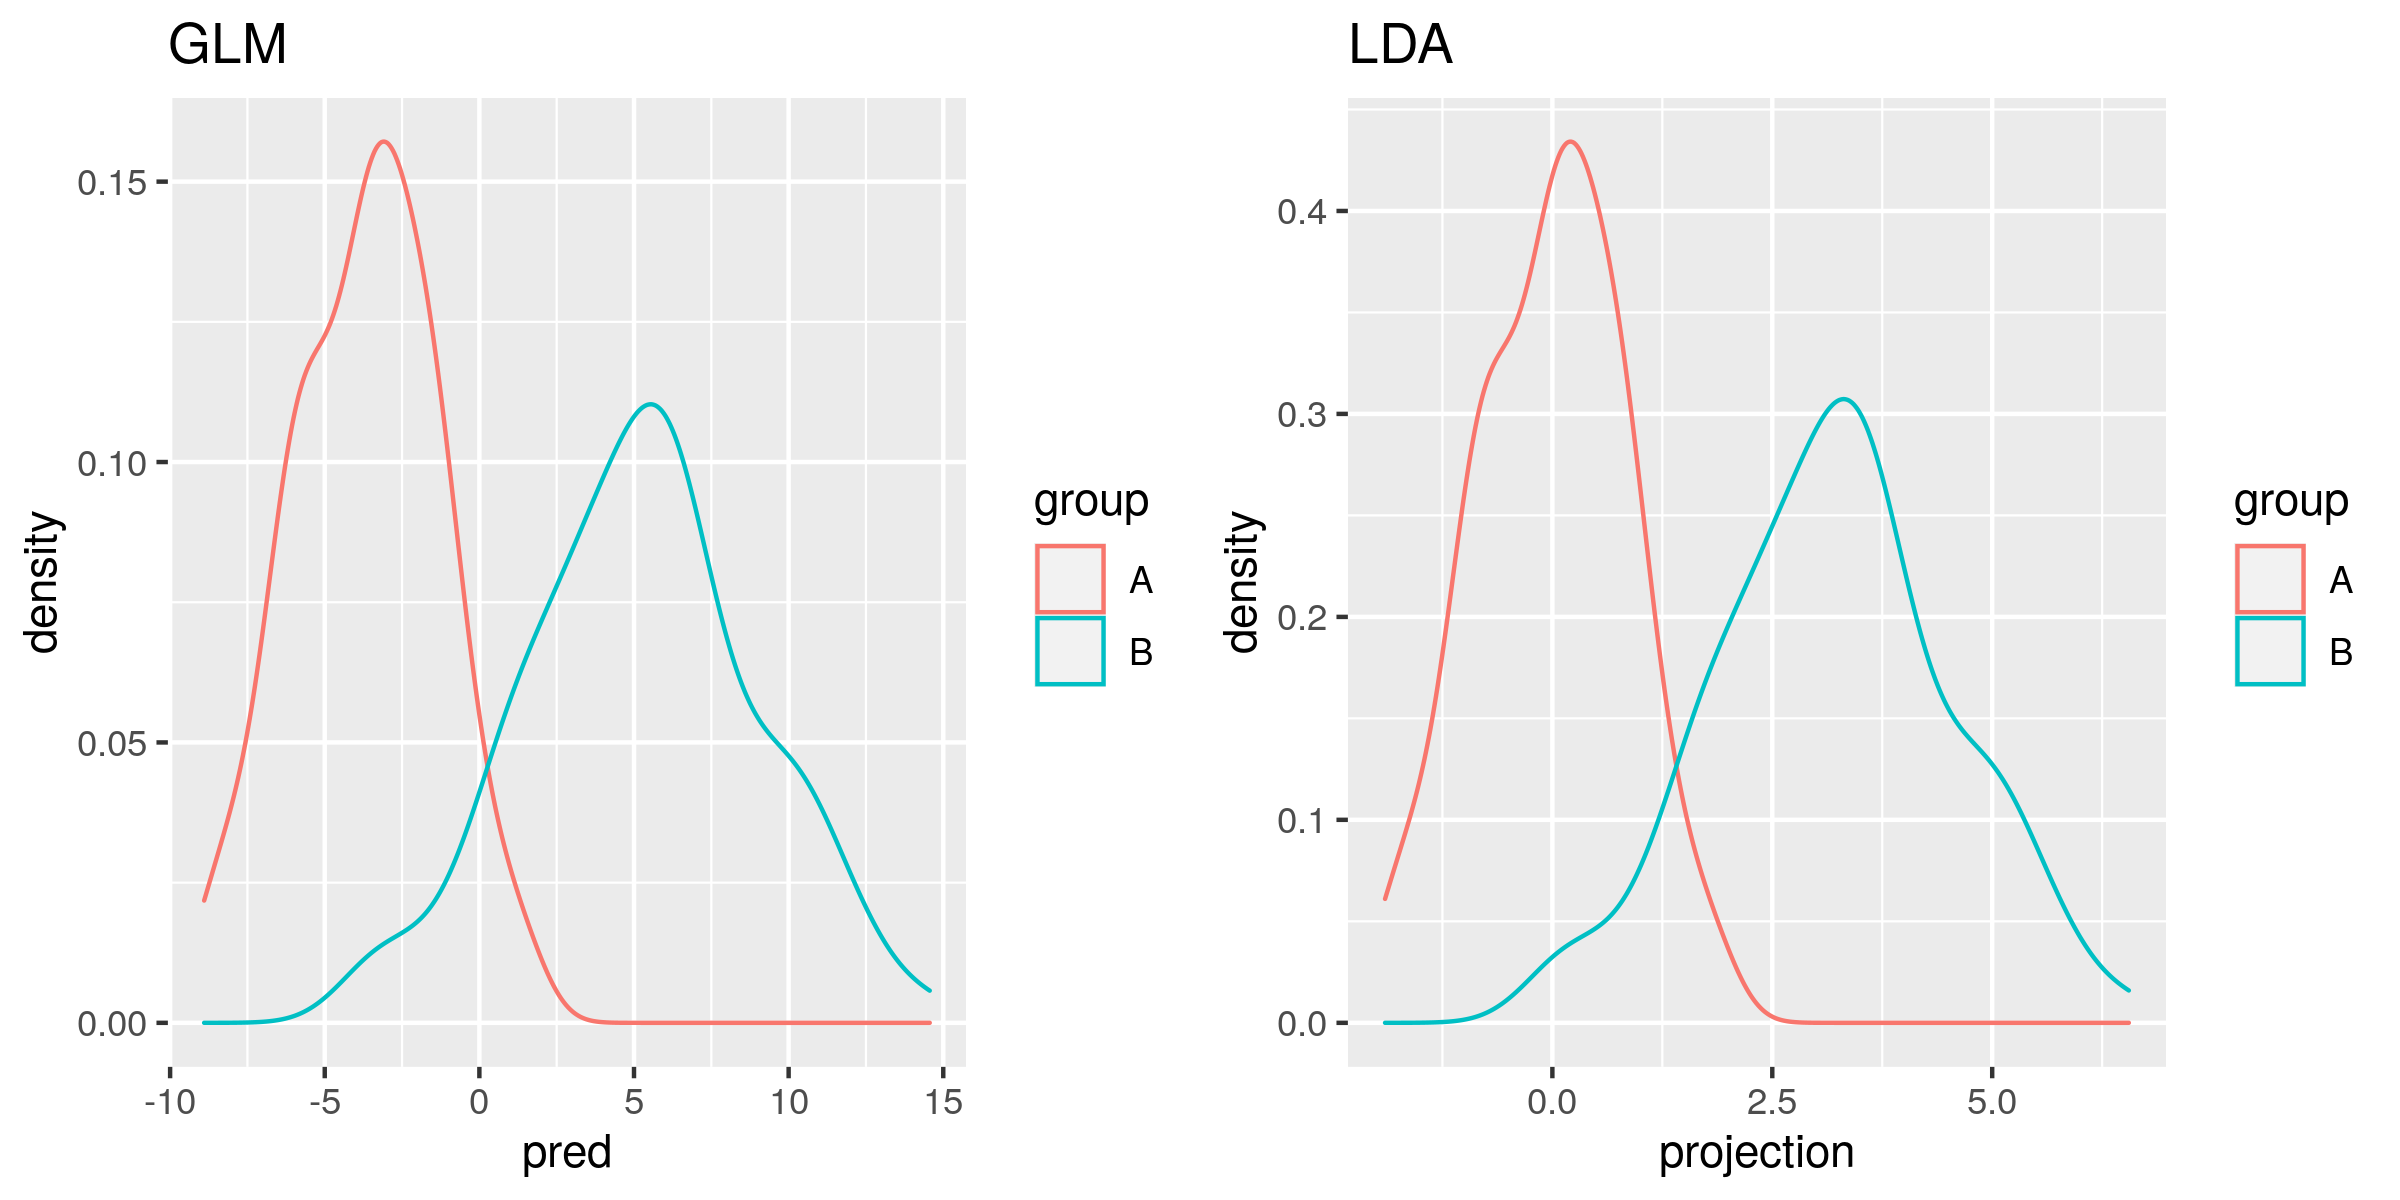

In [33]:
df_glm<-df
df_glm$pred<-predict(model_glm,df)

g1<-ggplot(df_glm,aes(x=pred,color=group))+geom_density()+ggtitle("GLM")
df$projection<-as.matrix(df[,2:3]) %*% w#l$scaling# w
#df$projection<-predict(l,df)$x+th
g2<-ggplot(df,aes(x=projection,color=group))+geom_density()+ggtitle("LDA")

ggarrange(g1,g2,ncol = 2)

### Ejemplo Iris

Vamos a utilizar el dataset Iris para ver si somos capaces de diferenciar una clase del resto

In [78]:
idx<-sample(1:nrow(iris),nrow(iris)*0.7)
iris_train<-iris[idx,]
iris_test<-iris[-idx,]

**Forma manual**

In [93]:
iris_class<-'virginica'
X<-iris_train[,1:4]
X<-as.matrix(X)
y<-as.matrix(ifelse(iris_train$Species==iris_class,1,0))

In [94]:
mA<-colMeans(X[y==1,])
mB<-colMeans(X[y==0,])

xA<-t(X[y==1,])
xB<-t(X[y==0,])
      
mA_rep<-matrix(rep(mA,each=ncol(xA)), ncol=ncol(xA), byrow=TRUE)
mB_rep<-matrix(rep(mB,each=ncol(xB)), ncol=ncol(xB), byrow=TRUE)

Sw<-(xA-mA_rep) %*% t(xA-mA_rep)+(xB-mB_rep) %*% t(xB-mB_rep)

In [95]:
Sw

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,39.311982,-1.349192,60.36816,21.583548
Sepal.Width,-1.349192,19.040202,-26.74859,-9.085051
Petal.Length,60.368157,-26.748586,156.96490,58.397146
Petal.Width,21.583548,-9.085051,58.39715,24.718346


In [97]:
w<-solve(Sw) %*% (mB-mA)
w

Sepal.Length,0.0004463733
Sepal.Width,-0.0164739405
Petal.Length,0.0119906015
Petal.Width,-0.0874620336


In [102]:
X_test<-iris_test[,1:4]
X_test<-as.matrix(X_test)
y_test<-as.matrix(ifelse(iris_test$Species==iris_class,1,0))

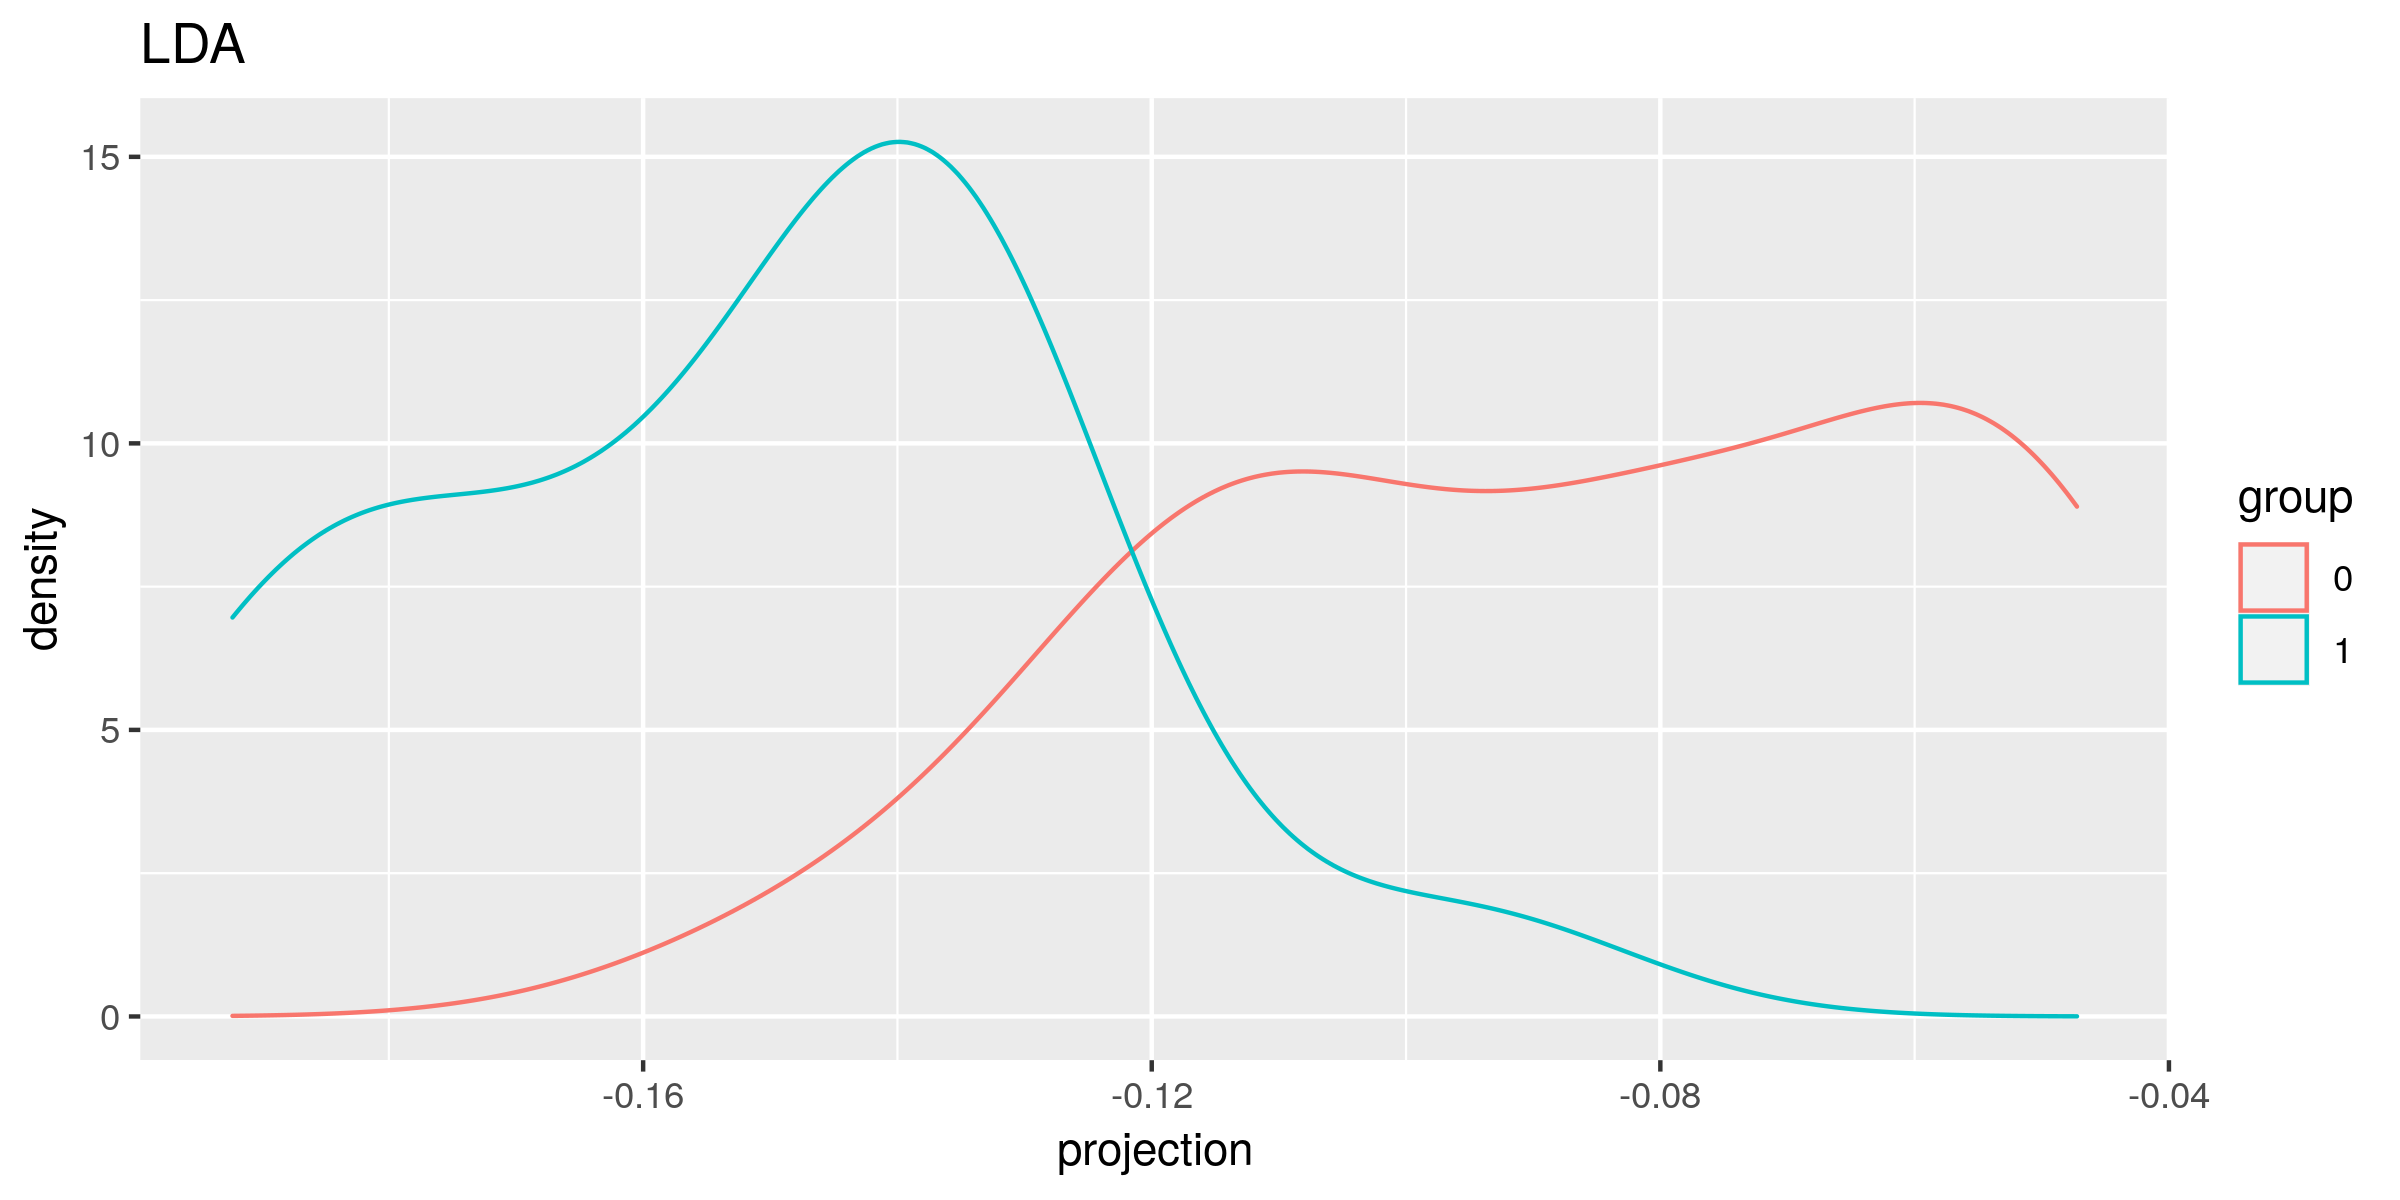

In [105]:
df=data.frame(projection=X_test %*% w,group=factor(y_test))
ggplot(df,aes(x=projection,color=group))+geom_density()+ggtitle("LDA")

**Usando función de R**

In [84]:
iris_class<-'virginica'
iris_train$class<-(ifelse(iris_train$Species==iris_class,1,0))
iris_test$class<-(ifelse(iris_test$Species==iris_class,1,0))
summary(iris_test)

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.600   Min.   :2.000   Min.   :1.30   Min.   :0.100   setosa    :11  
 1st Qu.:5.400   1st Qu.:2.700   1st Qu.:3.50   1st Qu.:1.000   versicolor:17  
 Median :5.900   Median :3.000   Median :4.50   Median :1.400   virginica :17  
 Mean   :6.018   Mean   :2.971   Mean   :4.12   Mean   :1.309                  
 3rd Qu.:6.700   3rd Qu.:3.200   3rd Qu.:5.30   3rd Qu.:1.800                  
 Max.   :7.700   Max.   :4.100   Max.   :6.70   Max.   :2.400                  
     class       
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.3778  
 3rd Qu.:1.0000  
 Max.   :1.0000  

In [85]:
l<-lda(class~Sepal.Length+Sepal.Width+Petal.Length+Petal.Width,data=iris_train)
l

Call:
lda(class ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
    data = iris_train)

Prior probabilities of groups:
        0         1 
0.6857143 0.3142857 

Group means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
0     5.415278    3.144444     2.736111   0.7430556
1     6.539394    2.984848     5.493939   2.0454545

Coefficients of linear discriminants:
                     LD1
Sepal.Length -0.01625078
Sepal.Width   0.59975444
Petal.Length -0.43653287
Petal.Width   3.18416492

In [98]:
l$scaling/sqrt(sum(l$scaling^2))

,LD1
Sepal.Length,-0.004970462
Sepal.Width,0.183440855
Petal.Length,-0.133517916
Petal.Width,0.973908473


In [99]:
w/sqrt(sum(w^2))

Sepal.Length,0.004970462
Sepal.Width,-0.183440855
Petal.Length,0.133517916
Petal.Width,-0.973908473


In [91]:
df=data.frame(projection=unname(predict(l,iris_test)$x),group=factor(iris_test$class))
head(df)

,projection,group
,<dbl>,<fct>
1,-1.816725,0
2,-2.113352,0
3,-1.946497,0
4,-2.092154,0
5,-1.075825,0
6,-1.745302,0


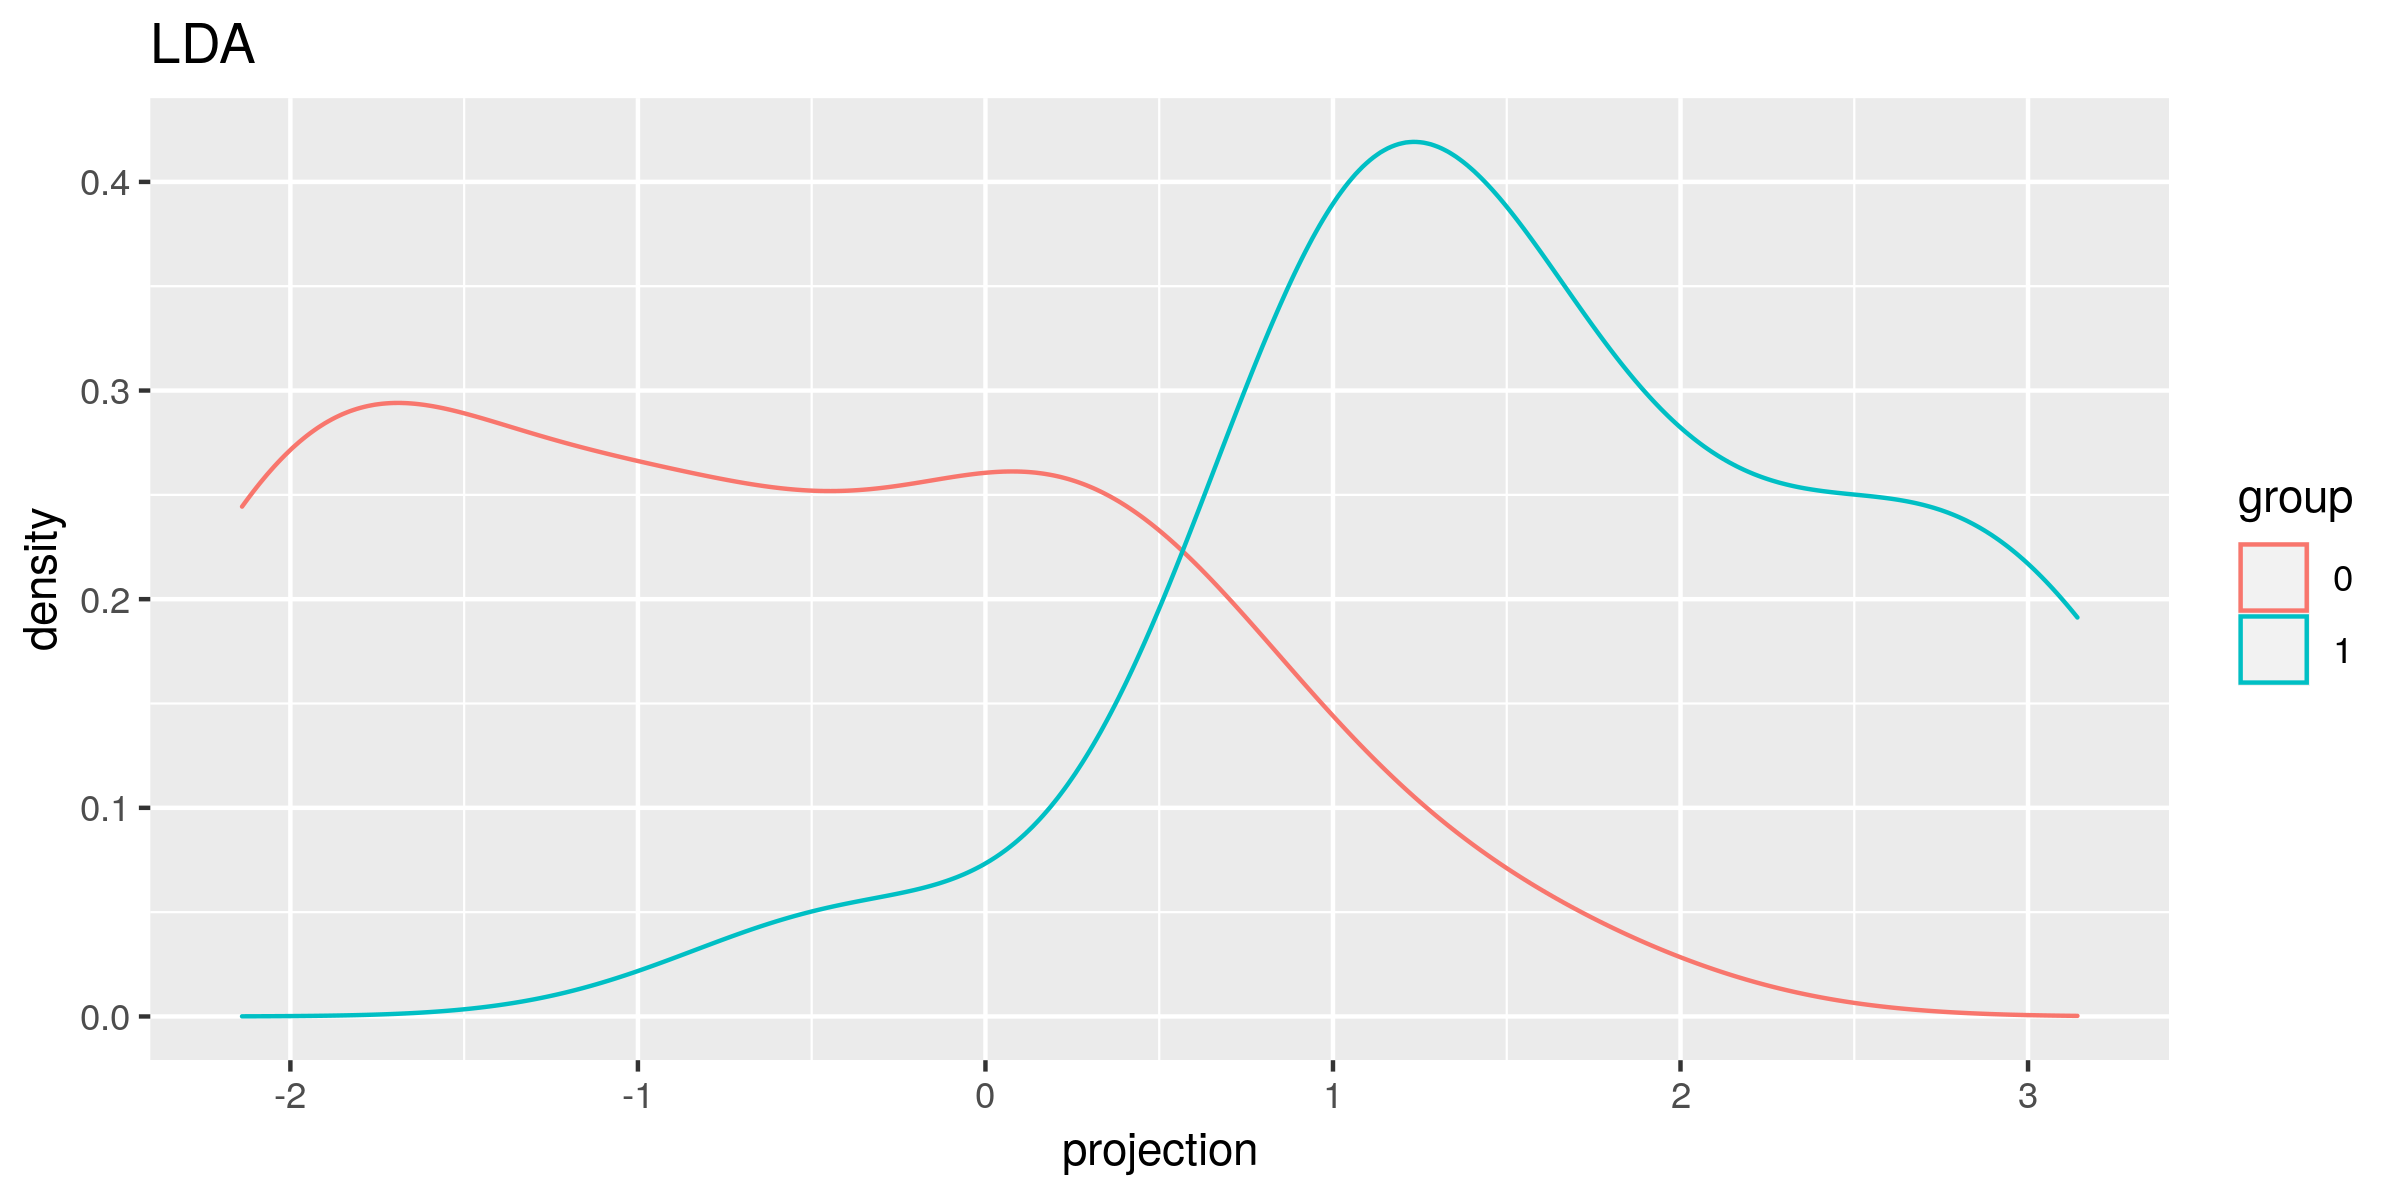

In [92]:

ggplot(df,aes(x=projection,color=group))+geom_density()+ggtitle("LDA")

## LDA para clases múltiples

Consideremos que tenemos dos clases y un vector sobre el que proyectaremos las dos clases, de tal forma que podamos resumir el valor de cada muestra en una sola dimensión. 
\\[
\vec y = X · \vec{w}
\\]
Donde
* X son los datos que queremos clasificar $X \in \mathbb{R}^{N\times p}$
* w es el vector de proyección, $w \in \mathbb{R}^{p\times1}$
* y son los datos proyectados, $y \in \mathbb{R}^{N\times1}$

Podemos generalizar a $K$ clases el problema suponiendo que $y$ tiene más columnas, una por cada clase que queremos clasificar:
\\[
\vec y_k = X · \vec{w_k}
\\]
* $w_k$ es el vector de proyección, $w \in \mathbb{R}^{p\times1}$ que diferencia la clase $k$ del resto
* $y_k$ son los datos proyectados que maximizan la separación entre la clase $k$ y el resto, $y_k \in \mathbb{R}^{N\times1}$

Podemos crear la matrix $Y$ combinando todas las $y_k$:
\\[
\vec Y = X · W
\\]
* $W$ es la matriz de proyección, $w \in \mathbb{R}^{p\times K}$
* $Y$ son los datos proyectados de tal forma que cada columa $k$ maximiza la separación entre la clase $k$ y el resto, $Y \in \mathbb{R}^{N\times K}$

Recordemos que Fisher lo que busca es el máximo del cociente:
\\[
    J(w)=\frac{\sigma_{entre ~ clases}}{\sigma_{dentro ~ clases}} =\frac{ |\vec w^T S_{between} \vec w|}{|\vec w^T S_{within} \vec w |}  = Tr \left\{ \left( \vec w^T S_{within} \vec w \right)^{-1} \left( \vec w^T S_{between} \vec w \right) \right\}
\\]

Definimos la media global y para cada clase:
\\[
\vec \mu= \frac{1}{N}\sum_{i\in N} x_i ~~~~~~~~~ \vec \mu \in \mathbb{R}^{p\times 1}\\
\vec \mu_k= \frac{1}{N_k}\sum_{i\in C_k} x_i  ~~~~~~~~~  \vec \mu_k \in \mathbb{R}^{p\times 1}
\\]

Donde $S_{between}$ es la varianza que hay entre clases. Como se separa cada clase de la media global.

Para dos clases era:
\\[
S_{between} = (\vec m_B - \vec m_A)(\vec m_B - \vec m_A)^T
\\]
La generalización para K clases es:
\\[
S_{between} = \sum_{k=1}^K N_k (\vec \mu_k - \vec \mu)(\vec \mu_k - \vec \mu)^T ~~~~~~~~~ S_{between} \in \mathbb{R}^{p\times p}\\
\\]


Donde $S_{within}$ es la suma de las varianzas de cada grupo. Como varían las muestras dentro de cada clase:

Para dos clases era:
\\[
S_{within} = \sum_{n \in C_A} (\vec x_n - m_A)(\vec x_n - m_A)^T + \sum_{n \in C_B} (\vec x_n - m_B)(\vec x_n - m_B)^T
\\]
La generalización para K clases es:
\\[
S_{within} = \sum_{k=1}^K \sum_{i\in C_k} (\vec x_i - \vec \mu_k)(\vec x_i - \vec \mu_k)^T ~~~~~~~~~\vec x_i \in \mathbb{R}^{p\times 1} ~~~  S_{within} \in \mathbb{R}^{p\times p}\\
\\]

El máximo de J(w) se consigue cuando:
\\[
S_{between}·W = \lambda S_{within} · W \\
 S_{within}^{-1} S_{between} W = \lambda W
\\]
La solución viene dada por los autovectores, de cuyos K-1 autovalores son mayores.

In [107]:
idx<-sample(1:nrow(iris),nrow(iris)*0.7)
iris_train<-iris[idx,]
iris_test<-iris[-idx,]

X<-iris_train[,1:4]
X<-as.matrix(X)
Cl<-iris_train$Species
p<-ncol(X)

In [108]:
table(Cl)

Cl
    setosa versicolor  virginica 
        41         34         30 

In [109]:
mu<-colMeans(X)
Sb=matrix(0L, nrow = p, ncol = p) 
for (k in levels(Cl)){
    mu_k=colMeans(X[Cl==k,])
    N_k=sum(Cl==k)
    Sb=Sb+N_k*(mu_k-mu) %*% t(mu_k-mu)
}
Sb

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
42.85726,-16.986024,116.38906,49.93966
-16.98602,9.846954,-48.61611,-19.55867
116.38906,-48.616114,318.06715,135.43589
49.93966,-19.558666,135.43589,58.21011


In [110]:
Sw<-matrix(0L, nrow=p, ncol=p)
for (k in levels(Cl)){
    X_k<-X[Cl==k,]
    mu_k=colMeans(X[Cl==k,])
    for (i in 1:nrow(X_k)){
        X_i<-as.matrix(X_k[i,])        
        Sw<-Sw+(X_i-mu_k) %*% t(X_i-mu_k)
    }
}
Sw

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,27.268076,8.784024,15.251610,3.869671
Sepal.Width,8.784024,10.813618,4.052114,2.626951
Petal.Length,15.251610,4.052114,15.974179,3.772780
Petal.Width,3.869671,2.626951,3.772780,3.588363


In [111]:
#Se puede calcular Sw de una forma más eficiente pensando :

Sw<-matrix(0L, nrow=p, ncol=p)
for (k in levels(Cl)){
    X_k<-X[Cl==k,]
    mu_k=colMeans(X[Cl==k,])
    
    mu_krep<-matrix(rep(mu_k,each=nrow(X_k)), ncol=nrow(X_k), byrow=TRUE)
    X_k<-t(as.matrix(X_k))
    Sw<-Sw+(X_k-mu_krep) %*% t(X_k-mu_krep)
    
}
Sw

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,27.268076,8.784024,15.251610,3.869671
Sepal.Width,8.784024,10.813618,4.052114,2.626951
Petal.Length,15.251610,4.052114,15.974179,3.772780
Petal.Width,3.869671,2.626951,3.772780,3.588363


In [112]:
(solve(Sw) %*% Sb)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,-3.732855,1.532534,-10.17981,-4.345738
Sepal.Width,-4.876686,2.273868,-13.51606,-5.656920
Petal.Length,9.320778,-4.007855,25.56319,10.837485
Petal.Width,11.712904,-4.554068,31.73874,13.655166


In [113]:
eig<-eigen(solve(Sw) %*% Sb)
eig

eigen() decomposition
$values
[1]  3.741942e+01  3.399448e-01 -5.450124e-15 -1.847959e-15

$vectors
           [,1]       [,2]       [,3]       [,4]
[1,] -0.2306955  0.0717137 -0.8435316  0.6249738
[2,] -0.3065786 -0.5308320  0.3329576  0.1501007
[3,]  0.5794992  0.2373492  0.4066504  0.1166483
[4,]  0.7190061 -0.8103949 -0.1105851 -0.7571465


Realmente la proyección óptima debería ser sobre K-1, es decir 2 columnas. 
Con los dos primeros autovectores podríamos definir bien las fronteras de las 3 clases:

In [114]:
W<-Re(eig$vectors[,1:2])
W
head(X %*% W)

-0.2306955,0.0717137
-0.3065786,-0.5308320
0.5794992,0.2373492
0.7190061,-0.8103949


110,2.567770,-1.972814
34,-1.601356,-1.664859
125,2.255689,-1.620203
47,-1.270546,-1.433742
129,2.420237,-1.400036
10,-1.139652,-1.019198


In [115]:
library(MASS)
l<-lda(formula=Species ~ Sepal.Length+Sepal.Width+Petal.Length+Petal.Width, data=iris_train)
l

Call:
lda(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
    data = iris_train)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3904762  0.3238095  0.2857143 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa         5.026829    3.446341     1.458537   0.2463415
versicolor     5.979412    2.750000     4.300000   1.3323529
virginica      6.560000    2.933333     5.546667   2.0400000

Coefficients of linear discriminants:
                    LD1        LD2
Sepal.Length  0.9422723  0.3051852
Sepal.Width   1.2522157 -2.2590116
Petal.Length -2.3669556  1.0100645
Petal.Width  -2.9367691 -3.4487207

Proportion of trace:
  LD1   LD2 
0.991 0.009 

In [116]:
W
l$scaling / sqrt(colSums(l$scaling^2))

-0.2306955,0.0717137
-0.3065786,-0.5308320
0.5794992,0.2373492
0.7190061,-0.8103949


,LD1,LD2
Sepal.Length,0.2306955,0.07471817
Sepal.Width,0.2942509,-0.53083204
Petal.Length,-0.5794992,0.24729303
Petal.Width,-0.6900943,-0.81039487


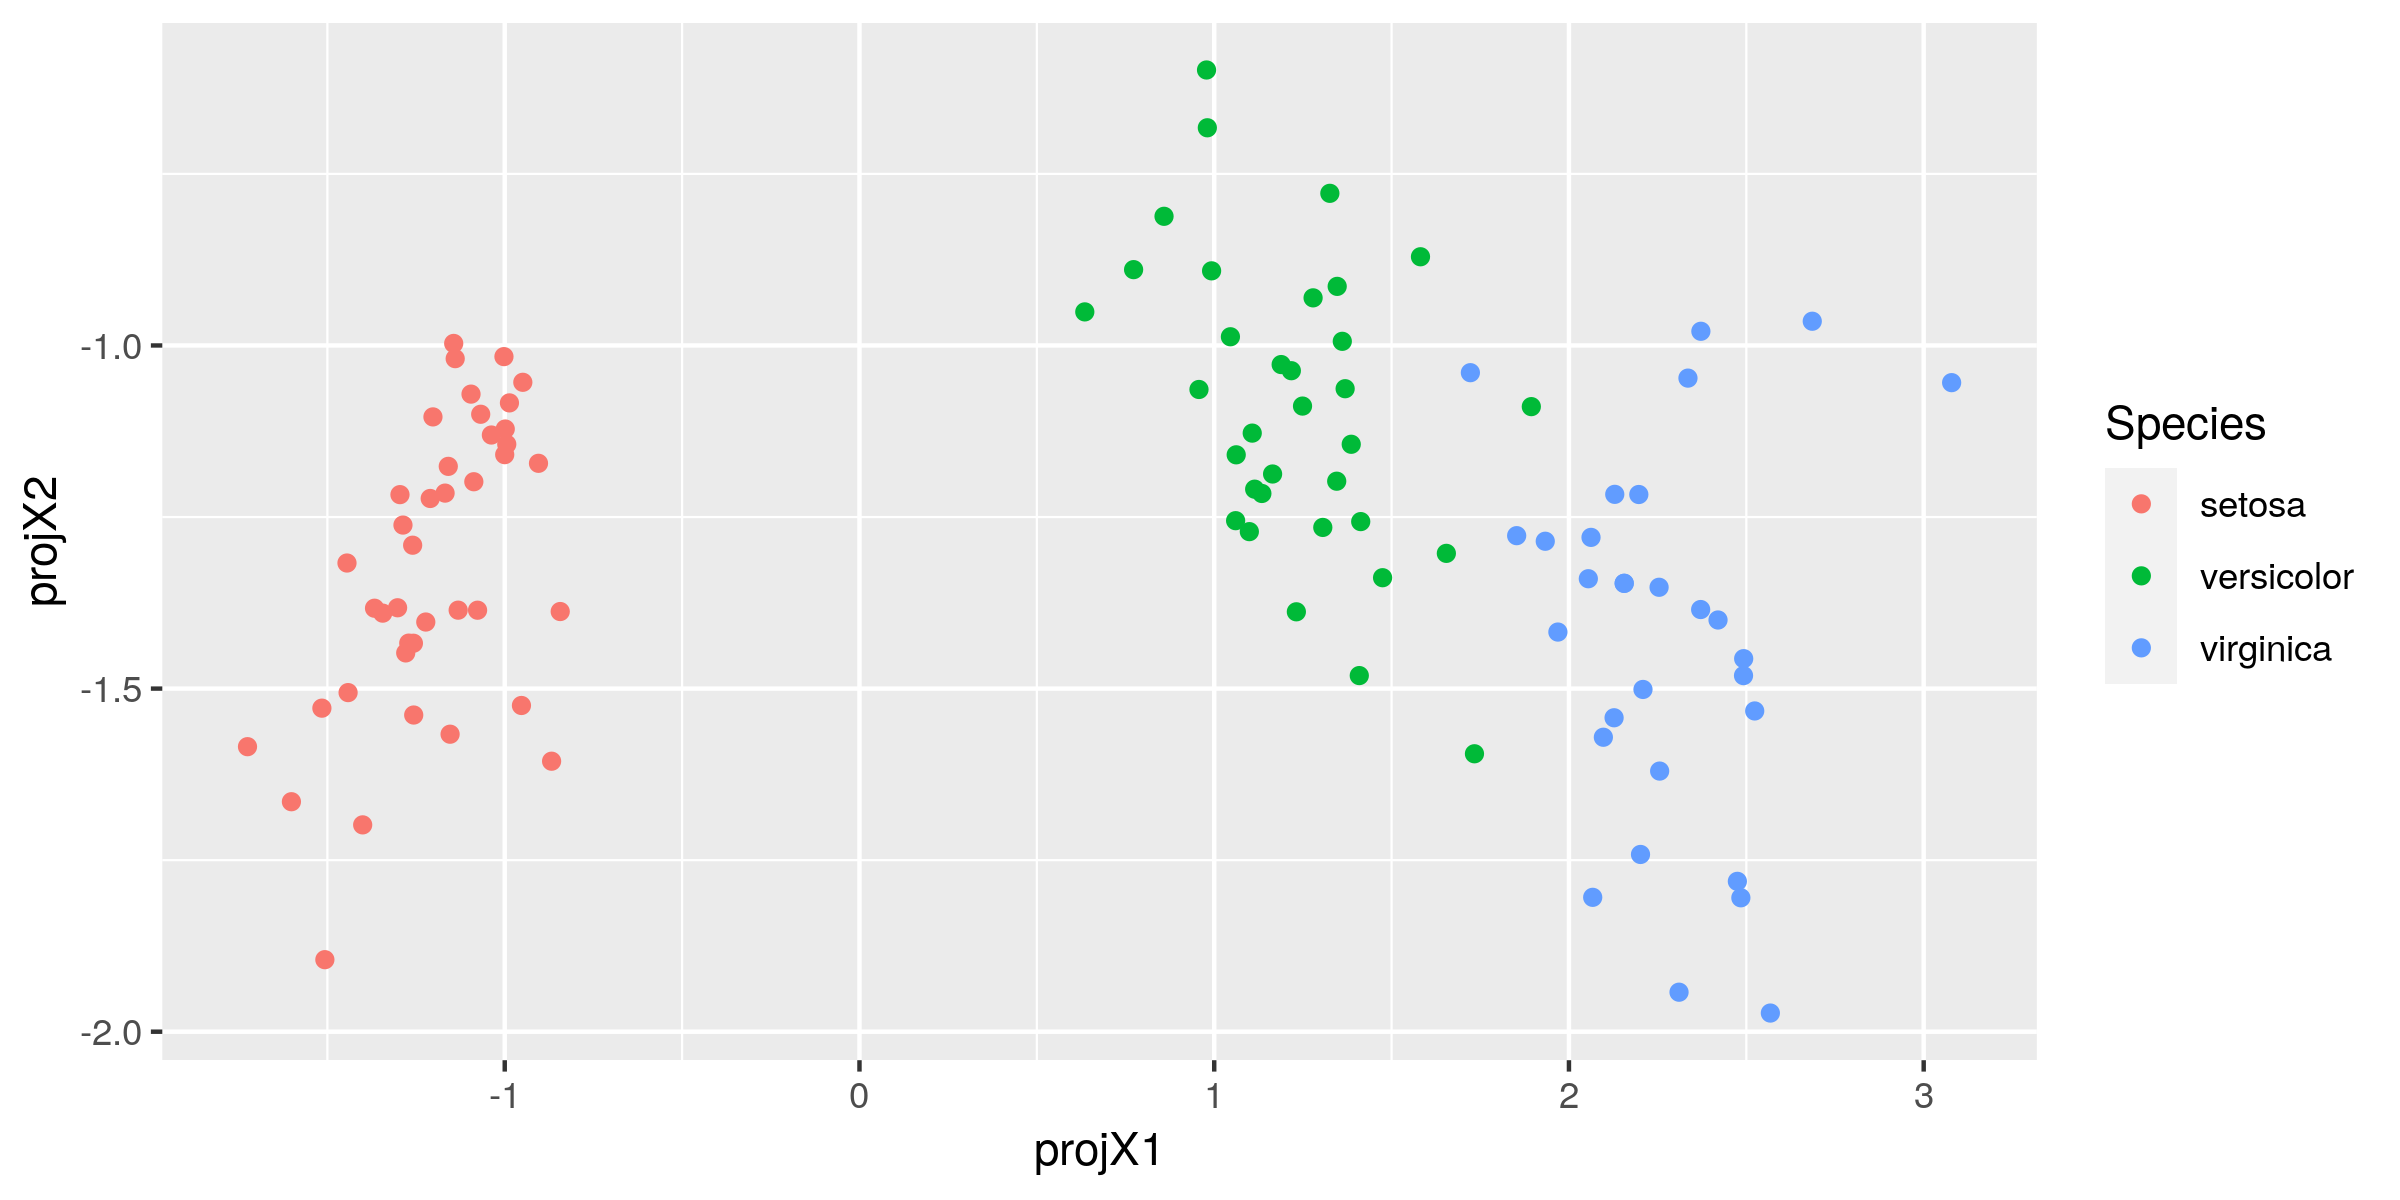

In [117]:
W<-eig$vectors[,1:2]
iris_train[,c("projX1","projX2")]<-Re(X %*% W)
ggplot(iris_train,aes(x=projX1,y=projX2,color=Species))+geom_point()

Como vemos, el mayor poder discriminante se encuenta en la primera proyección que es la que corresponde al autovalor más grande. Esto tiene sentido porque el primer autovector es 100 veces más grande que el segundo. Esto indica que la primera dimensión tiene casi todo el poder discriminante.

Podemos comprobarlo proyectando solo sobre el primer discrimante:

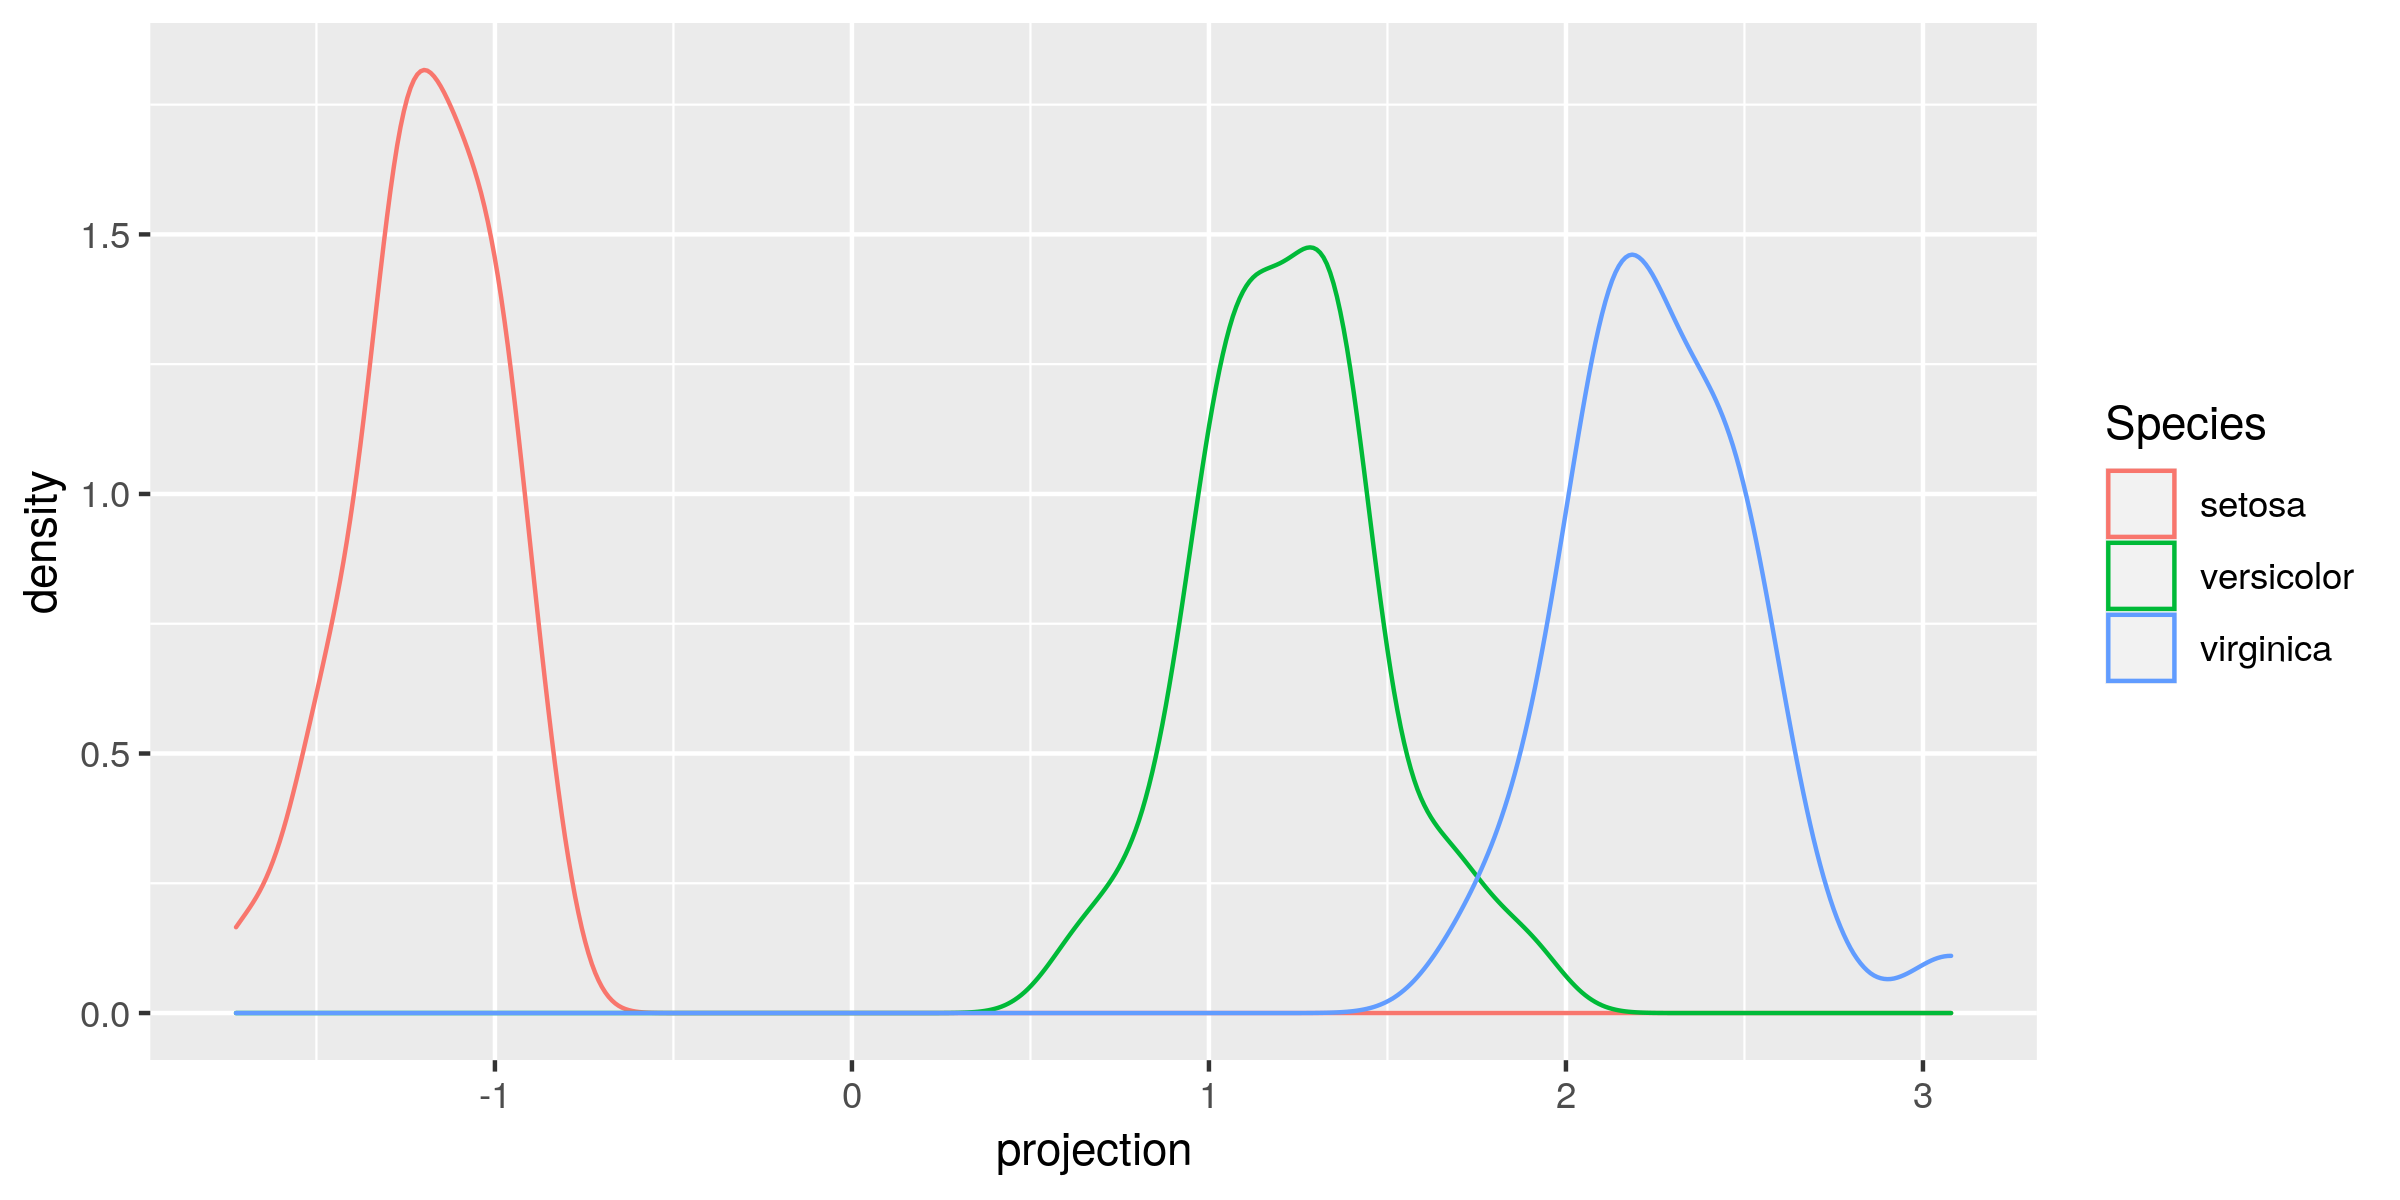

In [118]:
W<-eig$vectors[,1]
iris_train$projection <- Re(X %*% W)
ggplot(iris_train,aes(x=projection,color=Species))+geom_density()

Para el conjunto de training:

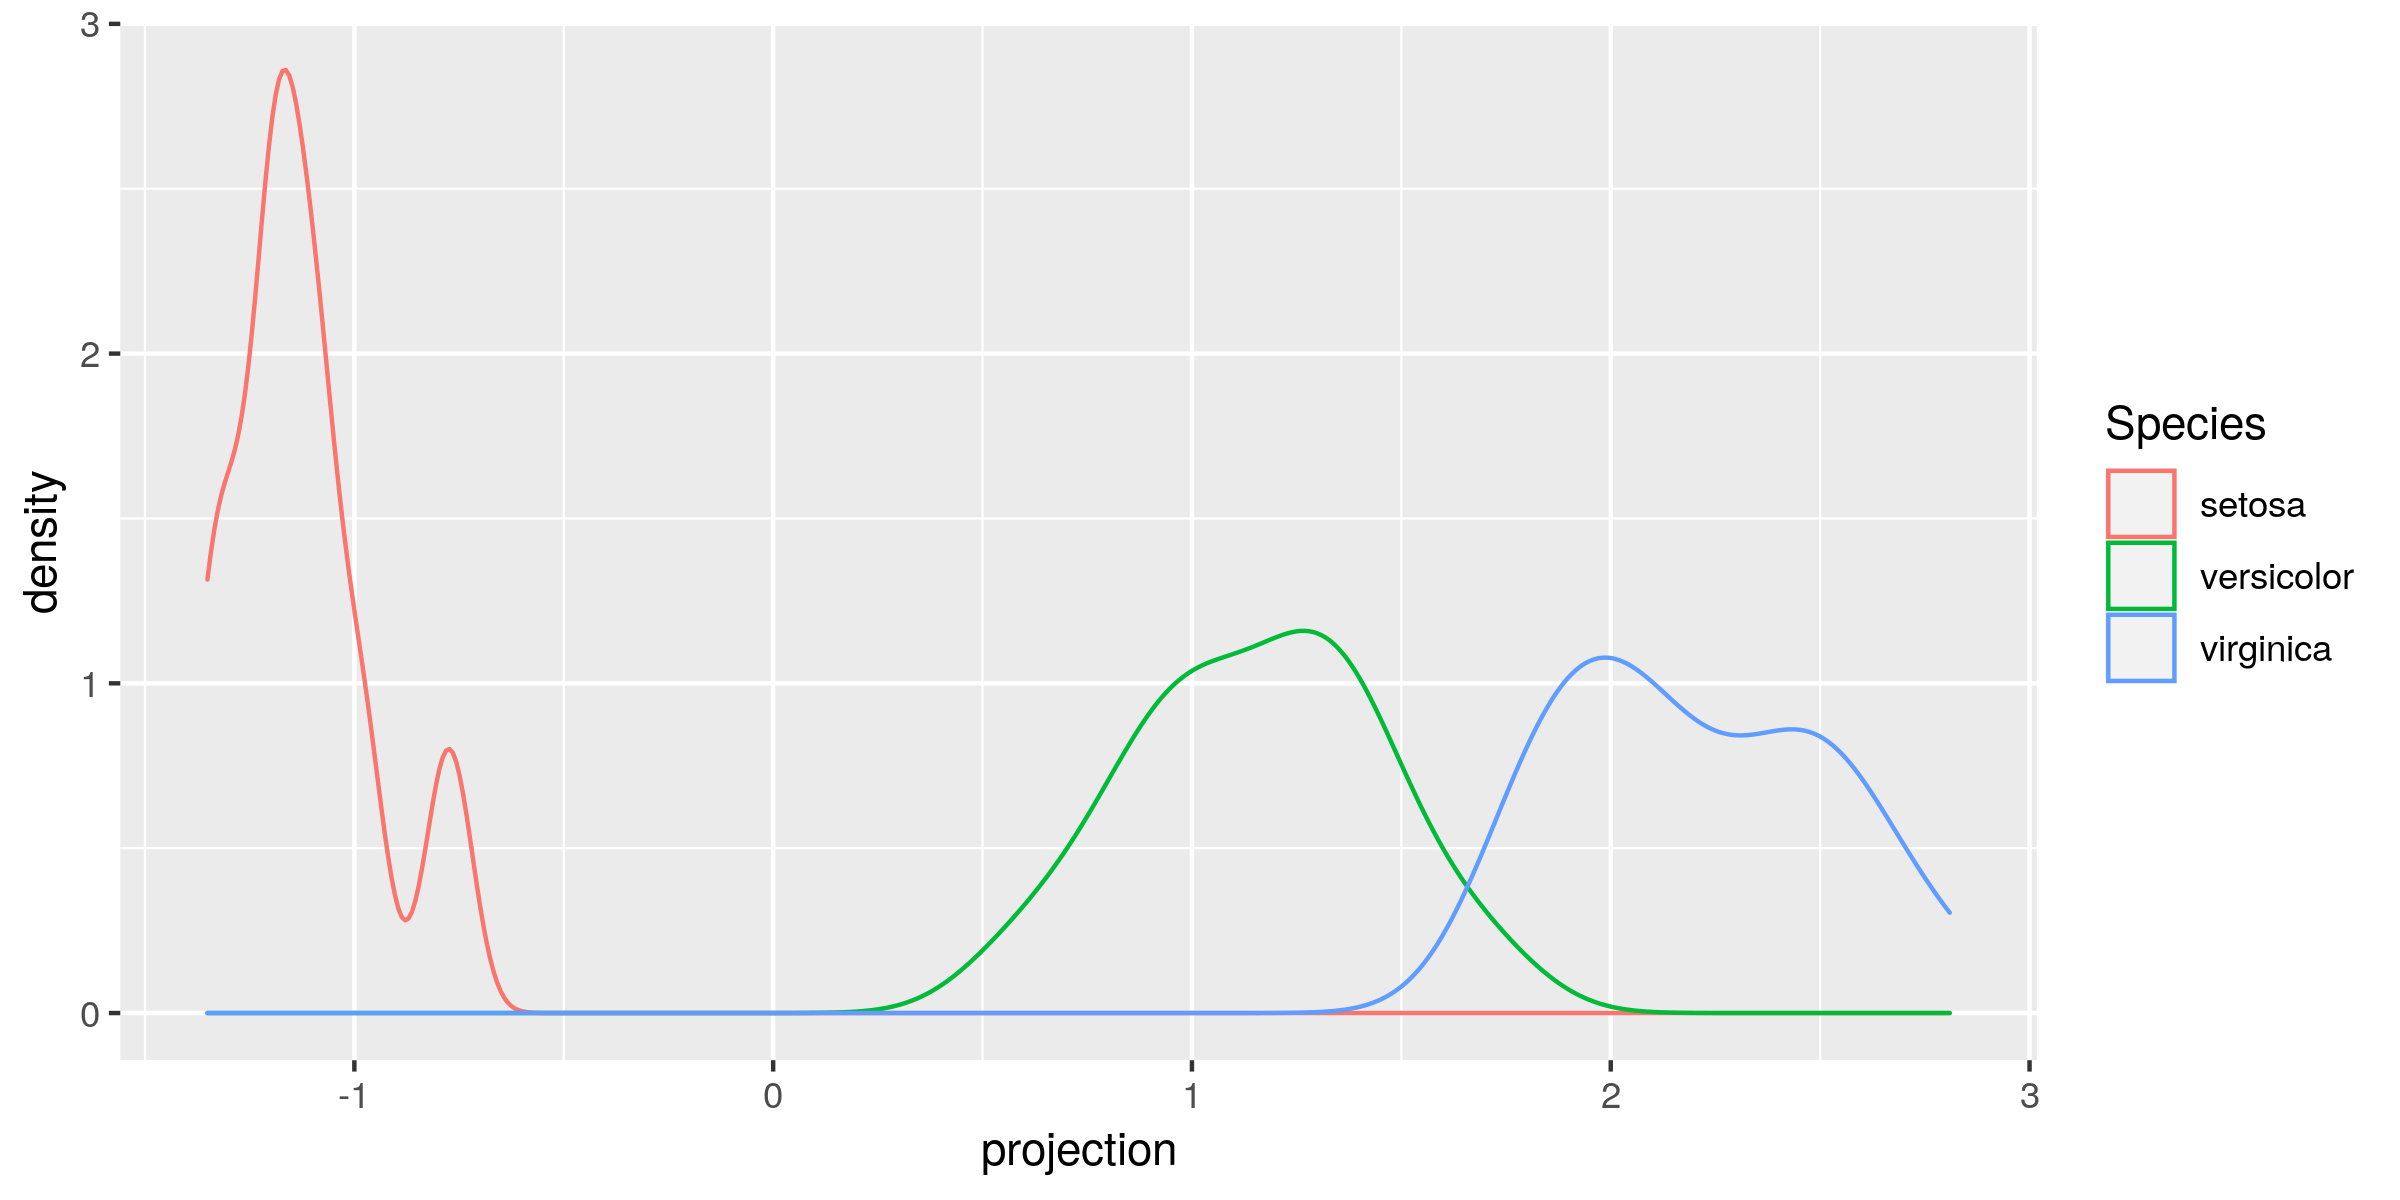

In [119]:
X_test<-as.matrix(iris_test[,1:4])
iris_test$projection <- Re(X_test %*% W)
ggplot(iris_test,aes(x=projection,color=Species))+geom_density()

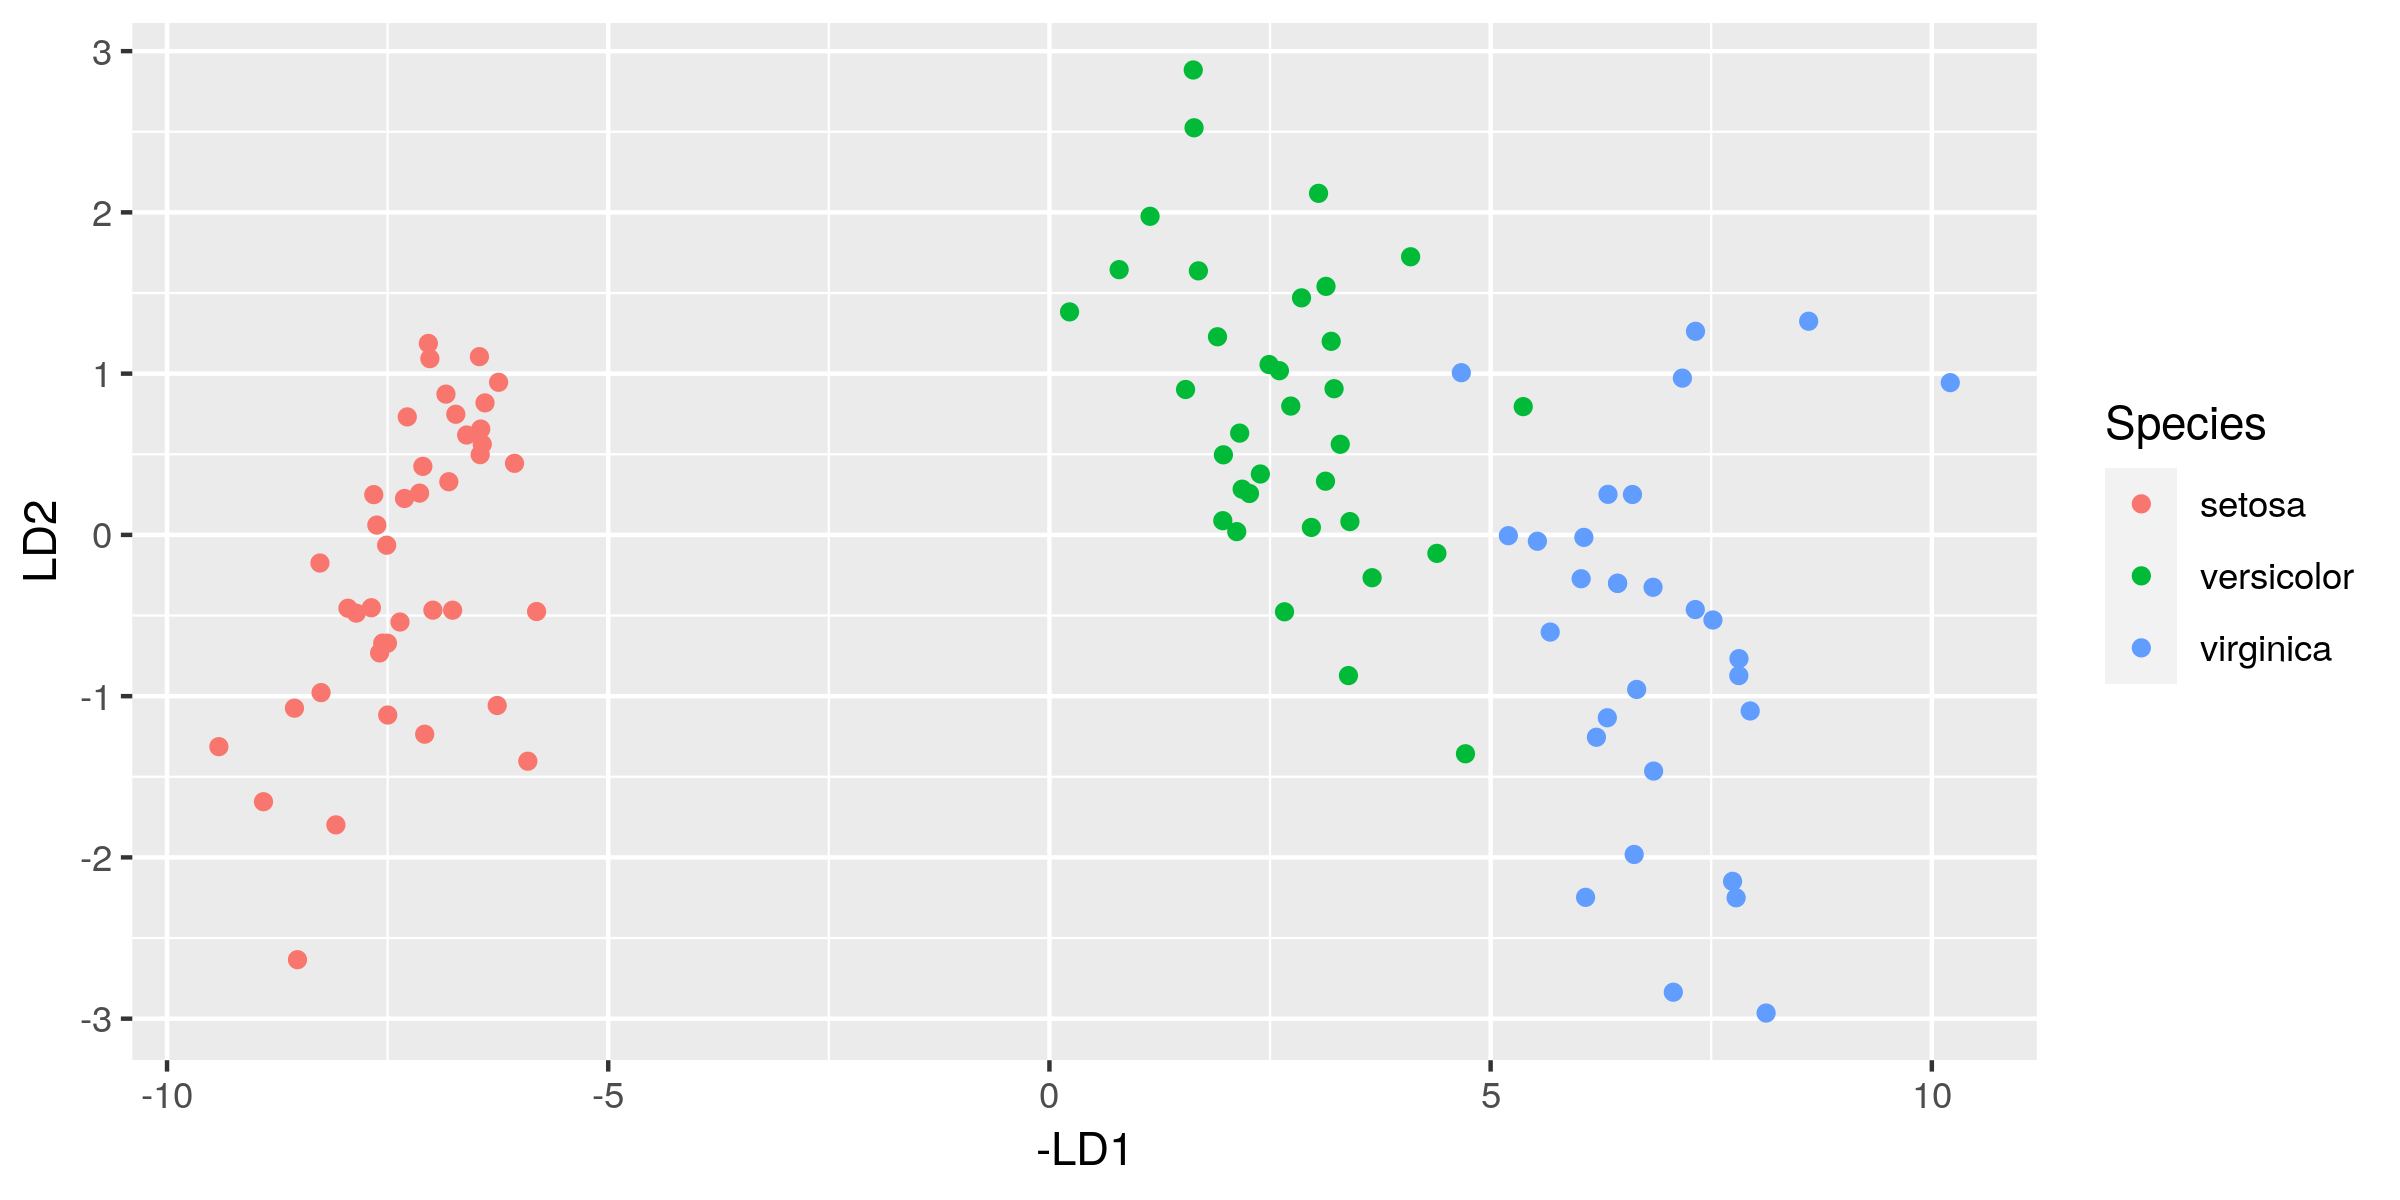

In [120]:
ld_iris<-predict(l,iris_train)
df_ld_iris<-data.frame(ld_iris$x)
df_ld_iris$Species<-iris_train$Species
ggplot(df_ld_iris,aes(x=-LD1,y=LD2,color=Species))+geom_point()

In [121]:
pred_test_iris <- predict(l,iris_test)
pred_test_iris

,setosa,versicolor,virginica
1,1.000000e+00,5.083212e-24,7.483571e-47
6,1.000000e+00,2.503509e-22,1.794262e-43
8,1.000000e+00,6.201061e-22,4.171363e-44
12,1.000000e+00,4.321145e-20,1.674745e-41
27,1.000000e+00,1.199317e-18,6.183010e-39
38,1.000000e+00,5.511574e-25,2.805337e-48
40,1.000000e+00,2.516930e-22,1.086099e-44
42,1.000000e+00,5.327259e-14,3.440499e-34
43,1.000000e+00,1.957619e-20,5.138484e-42
52,1.410821e-21,9.997645e-01,2.354511e-04


In [122]:
table(real=iris_test$Species, pred=pred_test_iris$class)

            pred
real         setosa versicolor virginica
  setosa          9          0         0
  versicolor      0         16         0
  virginica       0          1        19

In [123]:
cf_m<-caret::confusionMatrix(data=pred_test_iris$class, reference=iris_test$Species)
cf_m

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa          9          0         0
  versicolor      0         16         1
  virginica       0          0        19

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.4444          
    P-Value [Acc > NIR] : 8.12e-15        
                                          
                  Kappa : 0.9652          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                    1.0            1.0000           0.9500
Specificity                    1.0            0.9655           1.0000
Pos Pred Value                 1.0            0.9412           1.0000
Neg Pred Value                 1.0            1.0000           0.9615
P

https://www.rdocumentation.org/packages/caret/versions/6.0-85/topics/confusionMatrix



In [124]:
paste("La exhaustividad (recall, sensitivity) para Setosa:",cf_m$table[1,1]/sum(cf_m$table[,1]))
paste("La exhaustividad (recall, sensitivity) para Versicolor:",cf_m$table[2,2]/sum(cf_m$table[,2]))
paste("La exhaustividad (recall, sensitivity) para Virginica:",cf_m$table[3,3]/sum(cf_m$table[,3]))

[1] "La exhaustividad (recall, sensitivity) para Setosa: 1"

[1] "La exhaustividad (recall, sensitivity) para Versicolor: 1"

[1] "La exhaustividad (recall, sensitivity) para Virginica: 0.95"

In [125]:
paste("La precisión (Pos Pred Value) para Setosa:",cf_m$table[1,1]/sum(cf_m$table[1,]))
paste("La precisión (Pos Pred Value) para Versicolor:",cf_m$table[2,2]/sum(cf_m$table[2,]))
paste("La precisión (Pos Pred Value) para Virginica:",cf_m$table[3,3]/sum(cf_m$table[3,]))

[1] "La precisión (Pos Pred Value) para Setosa: 1"

[1] "La precisión (Pos Pred Value) para Versicolor: 0.941176470588235"

[1] "La precisión (Pos Pred Value) para Virginica: 1"

### Comparación con PCA

En PCA también podíamos reducir dimensionalidad, pero al ser agnóstico a la clasificación, no lo hace tan bien cuando tratamos de diferenciar clases etiquetadas a priori:

In [105]:
prmydata<-prcomp(X)
prmydata

Standard deviations (1, .., p=4):
[1] 2.0644326 0.4481292 0.2851751 0.1437300

Rotation (n x k) = (4 x 4):
                     PC1        PC2         PC3        PC4
Sepal.Length -0.36202591 -0.6892008 -0.56073146  0.2819925
Sepal.Width   0.08181696 -0.6941724  0.63389612 -0.3310685
Petal.Length -0.85532216  0.1940536  0.07509487 -0.4744765
Petal.Width  -0.36147922  0.0739602  0.52736771  0.7653404

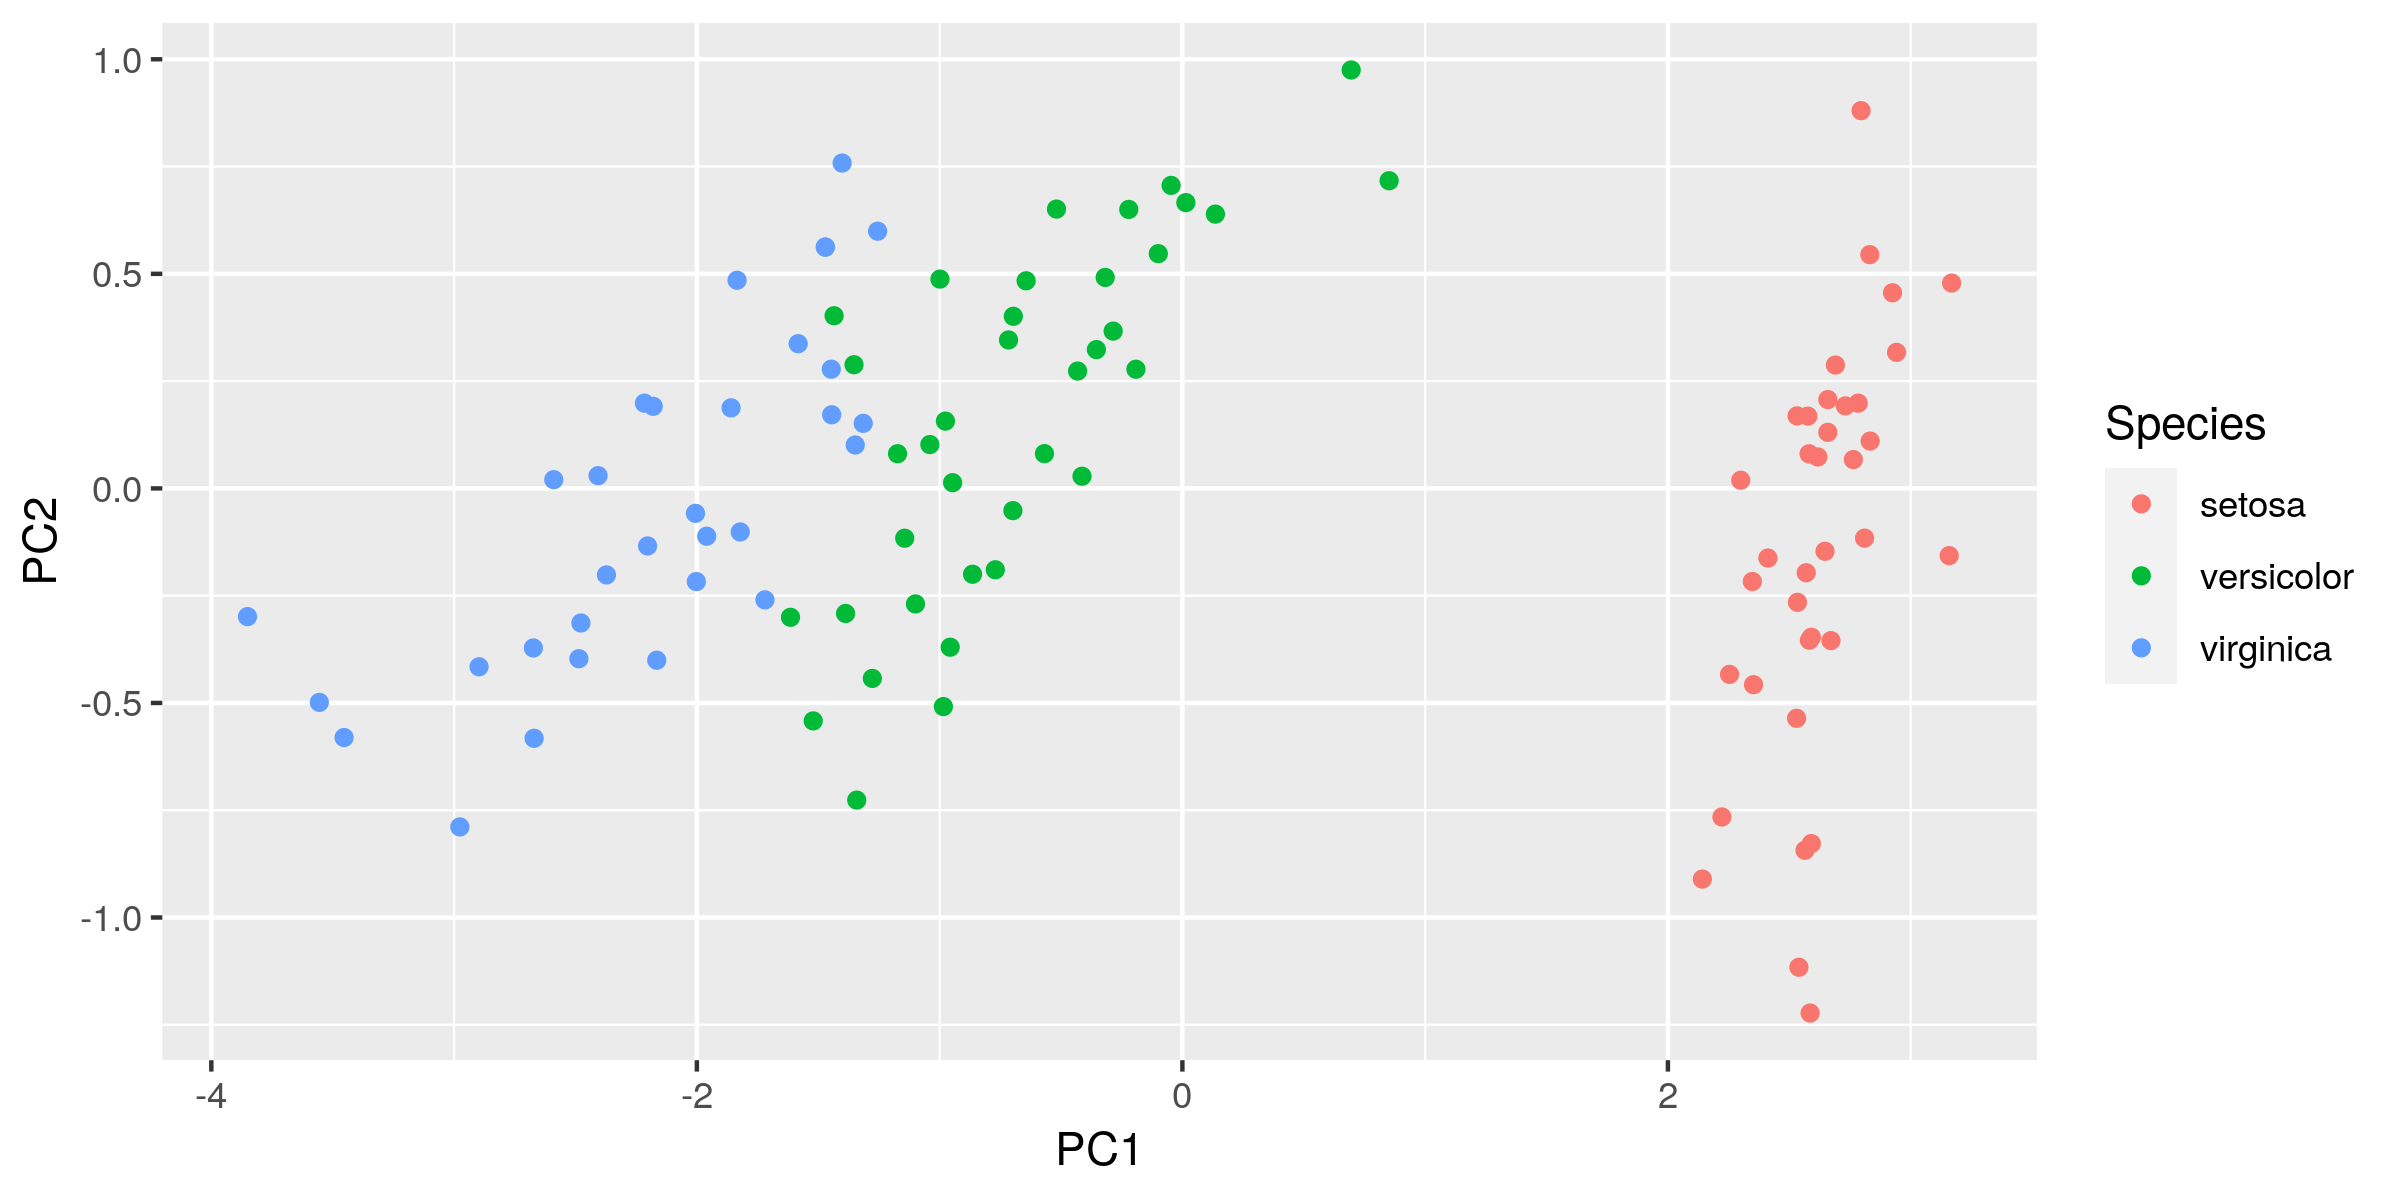

In [106]:
iris_train[,c("PC1","PC2")] <- predict(prmydata,newdata = iris_train[,1:4])[,1:2]

ggplot(iris_train,aes(x=PC1,y=PC2,color=Species))+geom_point()

Información de como repetir este mismo ejercicio en Python:
https://sebastianraschka.com/Articles/2014_python_lda.html#step-5-transforming-the-samples-onto-the-new-subspace